# **Project Name**    - Bird Species Observation Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Sharath Yelle

# **Project Summary -**

This project aims to analyze bird species distribution and diversity across two distinct ecosystems—forests and grasslands—to understand how environmental factors influence bird populations and behavior. The study will examine observational data from these habitats to identify patterns of habitat preference and assess the impact of various environmental conditions on bird diversity, providing valuable insights for conservation efforts and biodiversity management.

The project utilizes two primary datasets—Bird_Monitoring_Data_FOREST and Bird_Monitoring_Data_GRASSLAND—containing detailed information on bird observations including location details, temporal data, species identification, observation methods, environmental conditions, and conservation status. The initial phase will focus on data integration and preparation, combining these datasets while adding habitat type identifiers to enable comparative analysis. This will involve handling missing values, standardizing formats, and ensuring data quality before proceeding with analysis.

The exploratory data analysis will follow a structured approach organized around seven key dimensions: temporal patterns (seasonal trends, observation times), spatial analysis (location insights, plot-level comparisons), species metrics (diversity, activity patterns, sex ratios), environmental correlations (weather impacts, disturbance effects), behavioral observations (distance analysis, flyover frequency), observer trends (potential biases, visit patterns), and conservation insights (watchlist trends, stewardship status). This comprehensive framework will ensure all aspects mentioned in the project description are thoroughly examined.

Following the EDA, the project will develop an interactive Power BI dashboard to visualize key findings, enabling stakeholders to explore patterns in bird species distribution, habitat preferences, and conservation priorities. The dashboard will include multiple pages focusing on different analytical dimensions, with interactive filters to allow users to examine specific aspects of the data.

The expected outcomes include actionable insights for wildlife conservation, land management strategies, eco-tourism development, and policy support. By identifying biodiversity hotspots, species at risk, and the environmental factors most significantly impacting bird populations, this project will provide data-driven guidance for conservation planning and resource allocation. The findings will contribute to our understanding of how different ecosystems support bird diversity and help inform strategies to protect vulnerable species and their habitats in the face of environmental changes.

# **Problem Statement**


This project addresses the critical need to understand how environmental factors influence bird species distribution and diversity across forest and grassland ecosystems. Currently, there is insufficient analysis of available bird observation data to identify habitat preferences, seasonal patterns, and species-specific responses to environmental conditions. This knowledge gap hinders effective conservation planning, biodiversity management, and policy development. By systematically analyzing observational data from both habitats, this project will uncover patterns in bird populations, identify at-risk species, and determine how various environmental factors impact bird activity, providing actionable insights to guide conservation efforts, land management strategies, and policy decisions.

# **Step 1: Data Loading and Preparation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the two datasets
forest_df = pd.read_excel('/content/Bird_Monitoring_Data_FOREST.XLSX')
grassland_df = pd.read_excel('/content/Bird_Monitoring_Data_GRASSLAND.XLSX')

In [ ]:
# Add a column to identify the habitat type
forest_df['Habitat_Type'] = 'Forest'
grassland_df['Habitat_Type'] = 'Grassland'

# Display basic information about both datasets
print(f"Forest dataset shape: {forest_df.shape}")
print(f"Grassland dataset shape: {grassland_df.shape}")



Forest dataset shape: (333, 30)
Grassland dataset shape: (3588, 30)


In [ ]:
print("\nForest dataset columns:")
print(forest_df.columns.tolist())

print("\nGrassland dataset columns:")
print(grassland_df.columns.tolist())



Forest dataset columns:
['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Initial_Three_Min_Cnt', 'Habitat_Type']

Grassland dataset columns:
['Admin_Unit_Code', 'Sub_Unit_Code', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'TaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Previously_Obs', 'Initial_Three_Min_Cnt', 'Habitat_Type']


In [ ]:
# Rename the 'TaxonCode' column in grassland_df to 'NPSTaxonCode'
grassland_df.rename(columns={'TaxonCode': 'NPSTaxonCode'}, inplace=True)

# Verify the column names after renaming
print("\nGrassland dataset columns after renaming:")
print(grassland_df.columns.tolist())
print("\nForest dataset columns after renaming:")
print(forest_df.columns.tolist())


Grassland dataset columns after renaming:
['Admin_Unit_Code', 'Sub_Unit_Code', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Previously_Obs', 'Initial_Three_Min_Cnt', 'Habitat_Type']

Forest dataset columns after renaming:
['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Initial_Three_Min_Cnt', 'Habitat_Type']


In [ ]:
# Check if the columns are the same in both datasets
if set(forest_df.columns) == set(grassland_df.columns):
    print("\nBoth datasets have the same columns.")
else:
    print("\nDatasets have different columns.")
    print("Columns only in Forest dataset:", set(forest_df.columns) - set(grassland_df.columns))
    print("Columns only in Grassland dataset:", set(grassland_df.columns) - set(forest_df.columns))




Datasets have different columns.
Columns only in Forest dataset: {'Site_Name'}
Columns only in Grassland dataset: {'Previously_Obs'}


In [ ]:
# Display first few rows of each dataset
forest_df.head()


,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat_Type
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest


In [ ]:
grassland_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Habitat_Type
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,Grassland
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False,Grassland
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,Grassland
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,Grassland
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,Grassland


# **Step 2: Data Cleaning and Preprocessing**

In [ ]:
# Function to clean a dataset
def clean_dataset(df, habitat_name):
    # Make a copy to avoid modifying the original
    cleaned_df = df.copy()

    # Check for missing values
    missing_values = cleaned_df.isnull().sum()
    print(f"\nMissing values in {habitat_name} dataset:")
    print(missing_values[missing_values > 0])

    # Handle missing values based on the column type
    # For categorical columns, we'll fill with 'Unknown'
    categorical_cols = ['Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type',
                       'Observer', 'ID_Method', 'Distance', 'Sex', 'Common_Name',
                       'Scientific_Name', 'Sky', 'Wind', 'Disturbance']

    for col in categorical_cols:
        if col in cleaned_df.columns:
            cleaned_df[col] = cleaned_df[col].fillna('Unknown')

    # For numerical columns, we'll use median imputation
    numerical_cols = ['Year', 'Temperature', 'Humidity', 'Initial_Three_Min_Cnt']

    for col in numerical_cols:
        if col in cleaned_df.columns:
            median_val = cleaned_df[col].median()
            cleaned_df[col] = cleaned_df[col].fillna(median_val)

    # For date/time columns, we'll handle missing values carefully
    if 'Date' in cleaned_df.columns:
        # Convert to datetime if not already
        cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], errors='coerce')

        # For missing dates, we'll use the median date
        median_date = cleaned_df['Date'].median()
        cleaned_df['Date'] = cleaned_df['Date'].fillna(median_date)

    # Handle time columns
    if 'Start_Time' in cleaned_df.columns and 'End_Time' in cleaned_df.columns:
        # Convert to datetime.time if possible, or handle as strings
        # For simplicity, we'll keep as strings for now
        cleaned_df['Start_Time'] = cleaned_df['Start_Time'].fillna('Unknown')
        cleaned_df['End_Time'] = cleaned_df['End_Time'].fillna('Unknown')

    # Check for duplicates
    duplicate_count = cleaned_df.duplicated().sum()
    print(f"\nNumber of duplicate rows in {habitat_name} dataset: {duplicate_count}")

    # Remove duplicates if any
    if duplicate_count > 0:
        cleaned_df = cleaned_df.drop_duplicates()
        print(f"{habitat_name} dataset shape after removing duplicates: {cleaned_df.shape}")

    # Standardize categorical columns
    # For example, standardize Location_Type values
    if 'Location_Type' in cleaned_df.columns:
        cleaned_df['Location_Type'] = cleaned_df['Location_Type'].str.lower().str.strip()

    return cleaned_df

# Clean both datasets
cleaned_forest = clean_dataset(forest_df, "Forest")
cleaned_grassland = clean_dataset(grassland_df, "Grassland")

# Save cleaned datasets to CSV files
cleaned_forest.to_csv('Cleaned_Bird_Monitoring_Data_FOREST.csv', index=False)
cleaned_grassland.to_csv('Cleaned_Bird_Monitoring_Data_GRASSLAND.csv', index=False)

print("\nCleaned datasets saved to 'Cleaned_Bird_Monitoring_Data_FOREST.csv' and 'Cleaned_Bird_Monitoring_Data_GRASSLAND.csv'")


Missing values in Forest dataset:
Sub_Unit_Code    333
Distance           5
Sex              221
AcceptedTSN        1
dtype: int64

Number of duplicate rows in Forest dataset: 0

Missing values in Grassland dataset:
Sub_Unit_Code    3588
ID_Method           1
Distance          330
AcceptedTSN        20
NPSTaxonCode        1
dtype: int64

Number of duplicate rows in Grassland dataset: 458
Grassland dataset shape after removing duplicates: (3130, 30)

Cleaned datasets saved to 'Cleaned_Bird_Monitoring_Data_FOREST.csv' and 'Cleaned_Bird_Monitoring_Data_GRASSLAND.csv'


In [ ]:

# Load the cleaned datasets
forest_df = pd.read_csv('Cleaned_Bird_Monitoring_Data_FOREST.csv')
grassland_df = pd.read_csv('Cleaned_Bird_Monitoring_Data_GRASSLAND.csv')

# Add habitat type if not already present
forest_df['Habitat_Type'] = 'Forest'
grassland_df['Habitat_Type'] = 'Grassland'

# Combine datasets for analysis
combined_df = pd.concat([forest_df, grassland_df], ignore_index=True)

# Convert date column to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df['Year'] = combined_df['Date'].dt.year
combined_df['Month'] = combined_df['Date'].dt.month
combined_df['Day'] = combined_df['Date'].dt.day
combined_df['Day_of_Week'] = combined_df['Date'].dt.day_name()

# Add season column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

combined_df['Season'] = combined_df['Month'].apply(get_season)

# Set up visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

In [ ]:
# # Combine the cleaned datasets for comparative analysis
combined_df = pd.concat([cleaned_forest, cleaned_grassland], ignore_index=True)

# Save the combined dataset
combined_df.to_csv('Combined_Bird_Monitoring_Data.csv', index=False)
print("\nCombined dataset saved to 'Combined_Bird_Monitoring_Data.csv'")
print(f"Combined dataset shape: {combined_df.shape}")


Combined dataset saved to 'Combined_Bird_Monitoring_Data.csv'
Combined dataset shape: (3463, 31)


# **Step 3: Exploratory Data Analysis - Comparative Analysis**

# **1. Temporal Analysis**
Seasonal Trends

<Figure size 1200x600 with 0 Axes>

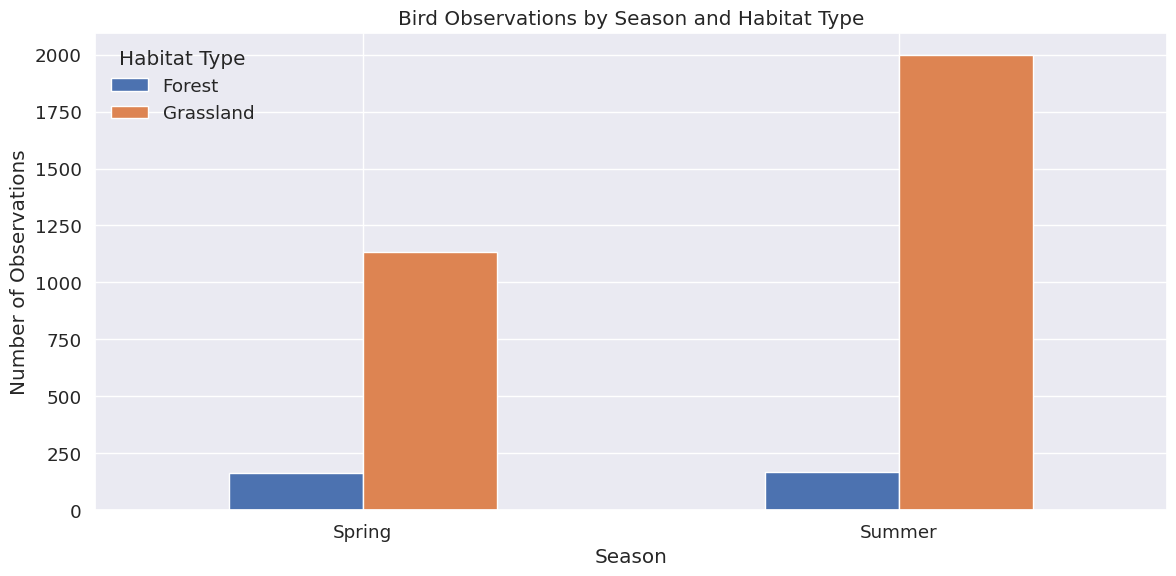

In [ ]:
# Analyze bird sightings by season
plt.figure(figsize=(12, 6))
seasonal_counts = combined_df.groupby(['Season', 'Habitat_Type']).size().unstack()
seasonal_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Bird Observations by Season and Habitat Type')
plt.xlabel('Season')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)
plt.legend(title='Habitat Type')
plt.tight_layout()
plt.savefig('observations_by_season_habitat.png')
plt.show()


<Figure size 1400x700 with 0 Axes>

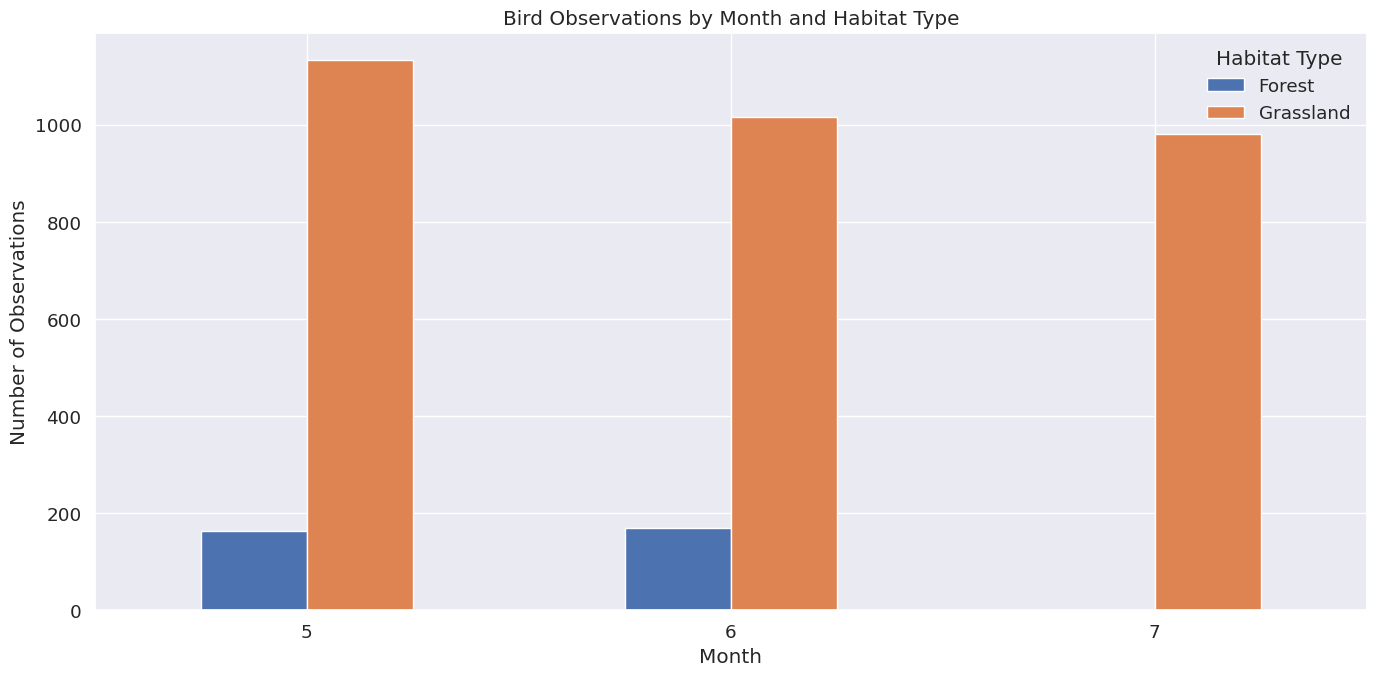

In [ ]:
# Analyze bird sightings by month
plt.figure(figsize=(14, 7))
monthly_counts = combined_df.groupby(['Month', 'Habitat_Type']).size().unstack()
monthly_counts.plot(kind='bar', figsize=(14, 7))
plt.title('Bird Observations by Month and Habitat Type')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)
plt.legend(title='Habitat Type')
plt.tight_layout()
plt.savefig('observations_by_month_habitat.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

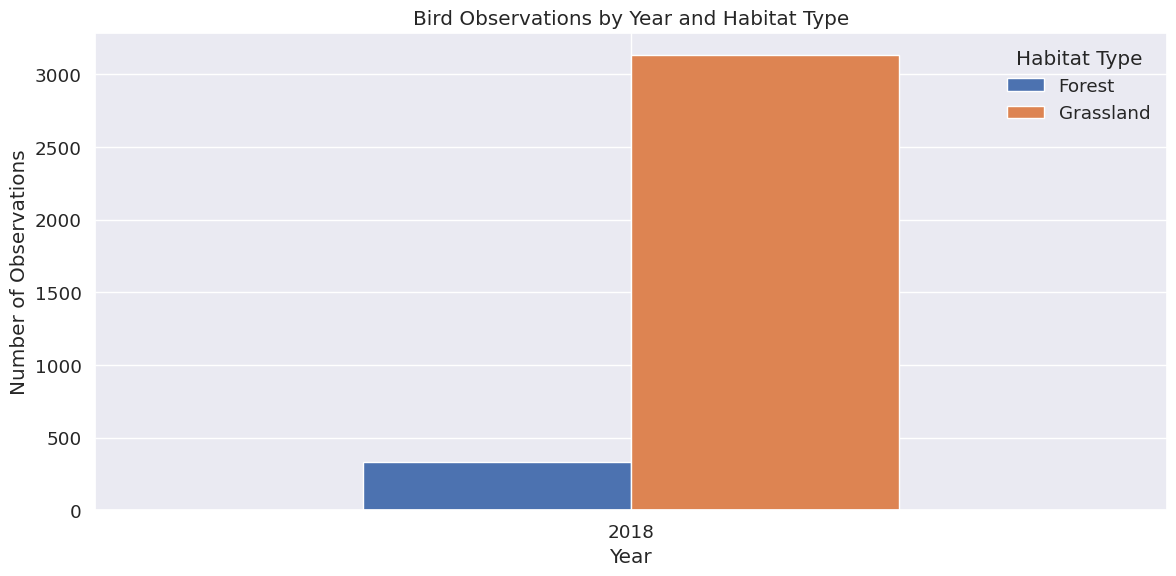

In [ ]:

# Analyze bird sightings by year
plt.figure(figsize=(12, 6))
yearly_counts = combined_df.groupby(['Year', 'Habitat_Type']).size().unstack()
yearly_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Bird Observations by Year and Habitat Type')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)
plt.legend(title='Habitat Type')
plt.tight_layout()
plt.savefig('observations_by_year_habitat.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

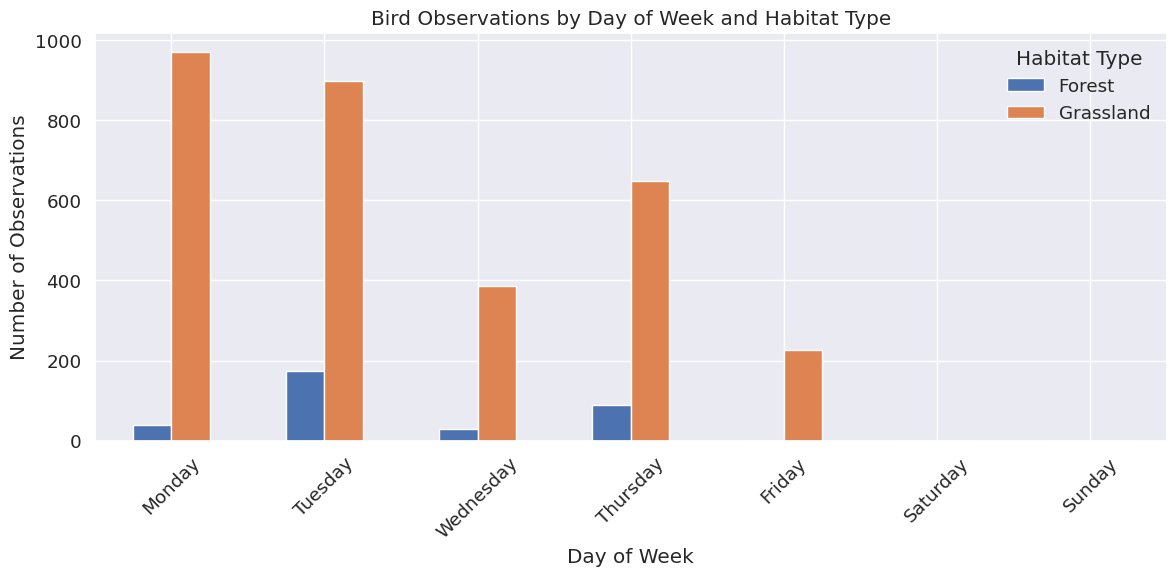

In [ ]:
# Analyze bird sightings by day of week
plt.figure(figsize=(12, 6))
dow_counts = combined_df.groupby(['Day_of_Week', 'Habitat_Type']).size().unstack()
# Reorder days of week
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = dow_counts.reindex(dow_order)
dow_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Bird Observations by Day of Week and Habitat Type')
plt.xlabel('Day of Week')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.legend(title='Habitat Type')
plt.tight_layout()
plt.savefig('observations_by_dow_habitat.png')
plt.show()

# **2. Spatial Analysis**

Location Insights

<Figure size 1200x600 with 0 Axes>

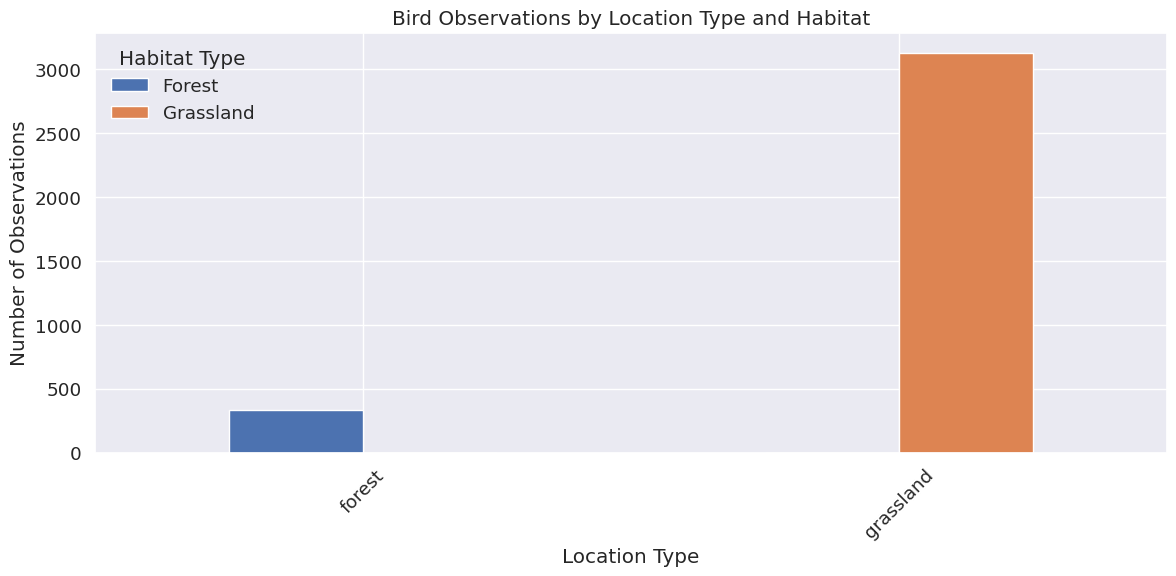

In [ ]:
# Analyze observations by location type
plt.figure(figsize=(12, 6))
location_counts = combined_df.groupby(['Location_Type', 'Habitat_Type']).size().unstack()
location_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Bird Observations by Location Type and Habitat')
plt.xlabel('Location Type')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.legend(title='Habitat Type')
plt.tight_layout()
plt.savefig('observations_by_location_type.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

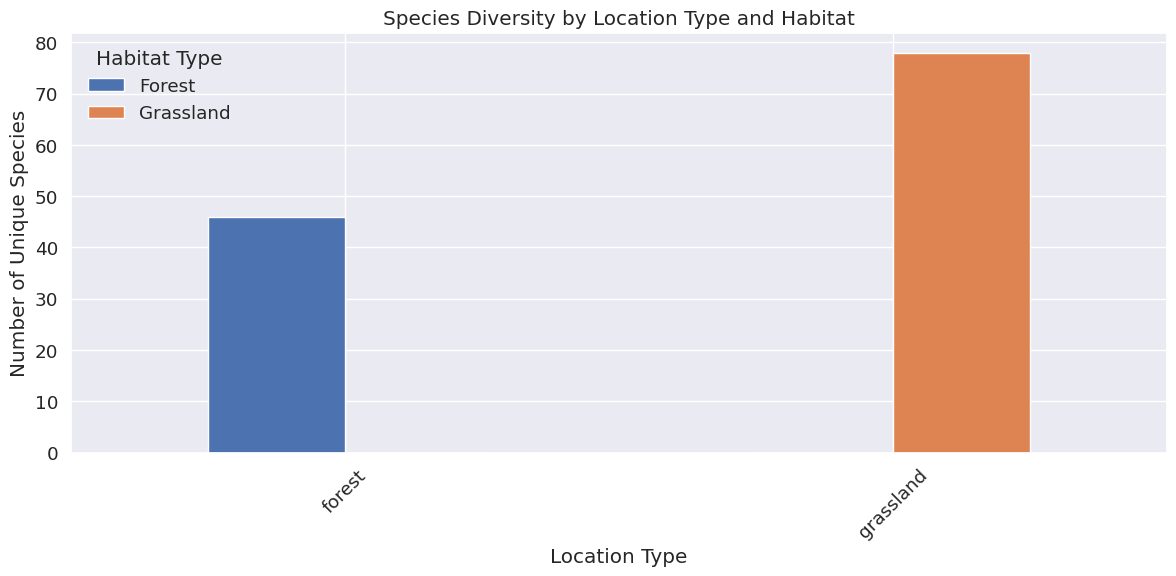

In [ ]:

# Species diversity by location type
location_diversity = combined_df.groupby(['Location_Type', 'Habitat_Type'])['Scientific_Name'].nunique().unstack()
plt.figure(figsize=(12, 6))
location_diversity.plot(kind='bar', figsize=(12, 6))
plt.title('Species Diversity by Location Type and Habitat')
plt.xlabel('Location Type')
plt.ylabel('Number of Unique Species')
plt.xticks(rotation=45)
plt.legend(title='Habitat Type')
plt.tight_layout()
plt.savefig('species_diversity_by_location_type.png')
plt.show()

**Plot-Level Analysis**

<Figure size 1400x700 with 0 Axes>

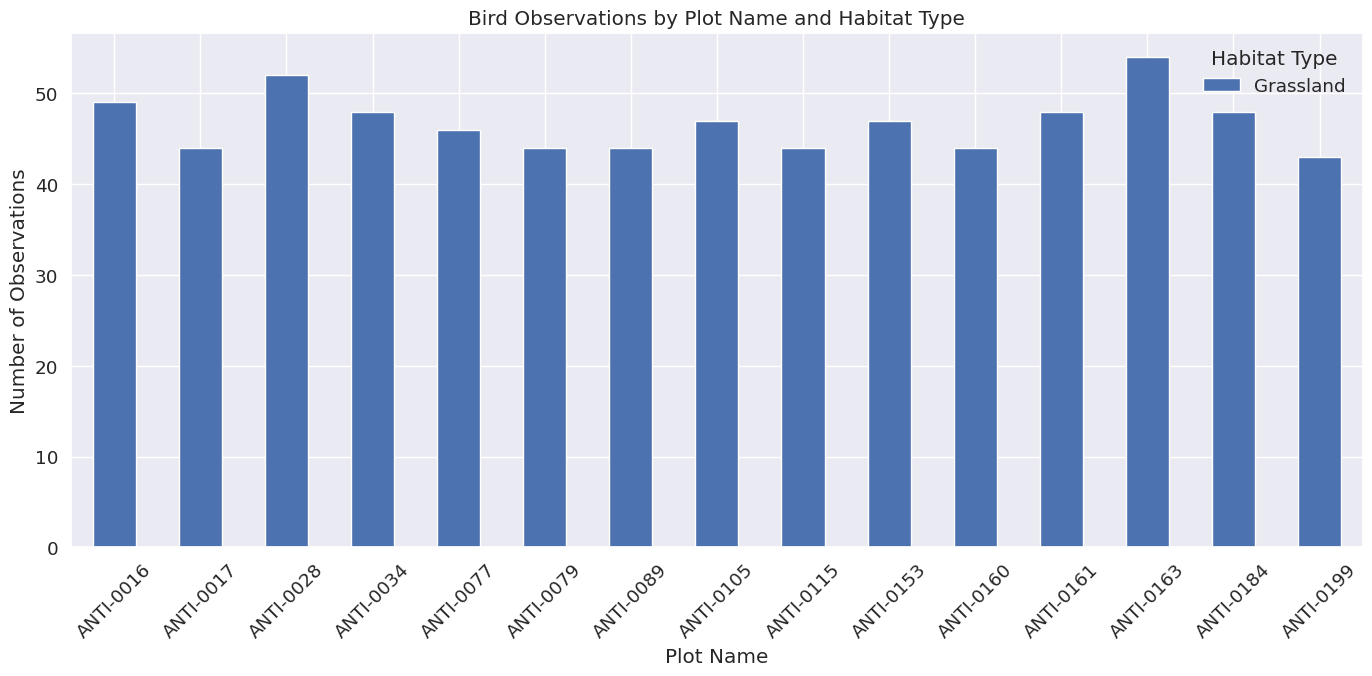

In [ ]:
# Get top 15 plots by observation count
top_plots = combined_df['Plot_Name'].value_counts().head(15).index.tolist()
top_plot_data = combined_df[combined_df['Plot_Name'].isin(top_plots)]

# Analyze observations by plot
plt.figure(figsize=(14, 7))
plot_counts = top_plot_data.groupby(['Plot_Name', 'Habitat_Type']).size().unstack()
plot_counts.plot(kind='bar', figsize=(14, 7))
plt.title('Bird Observations by Plot Name and Habitat Type')
plt.xlabel('Plot Name')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.legend(title='Habitat Type')
plt.tight_layout()
plt.savefig('observations_by_plot.png')
plt.show()

<Figure size 1400x700 with 0 Axes>

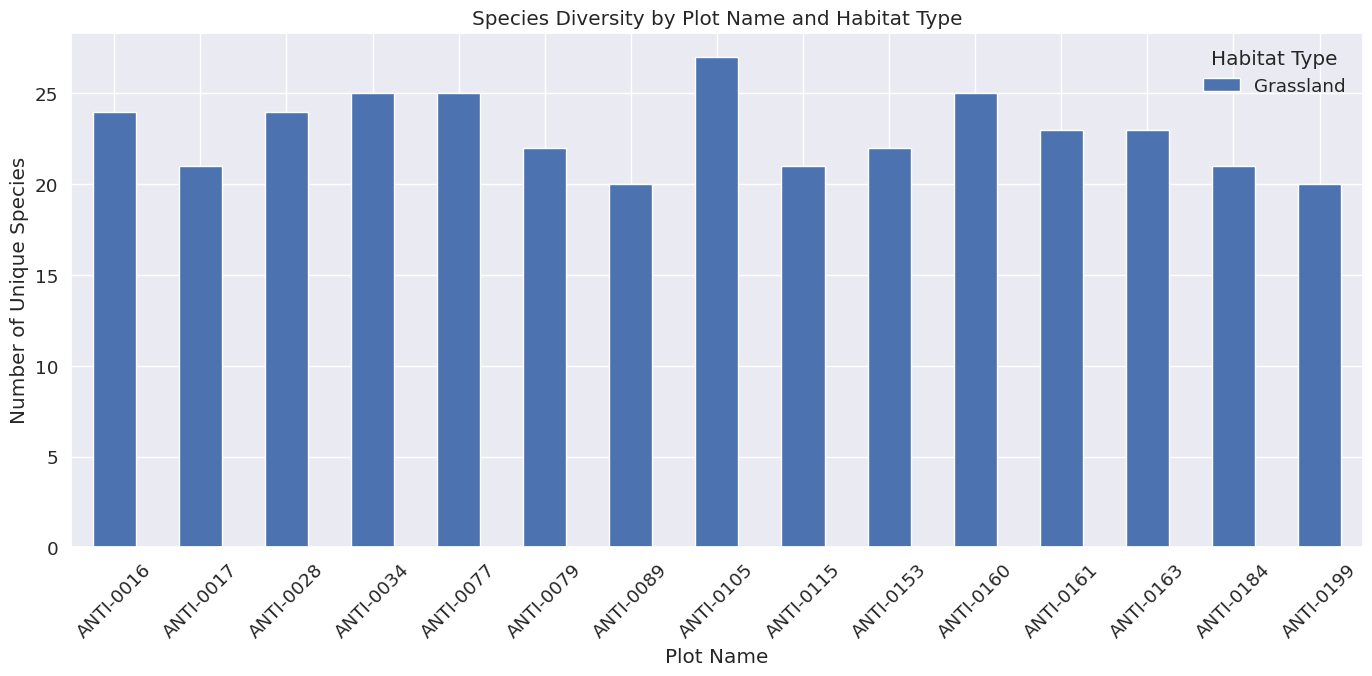

In [ ]:
# Species diversity by plot
plot_diversity = top_plot_data.groupby(['Plot_Name', 'Habitat_Type'])['Scientific_Name'].nunique().unstack()
plt.figure(figsize=(14, 7))
plot_diversity.plot(kind='bar', figsize=(14, 7))
plt.title('Species Diversity by Plot Name and Habitat Type')
plt.xlabel('Plot Name')
plt.ylabel('Number of Unique Species')
plt.xticks(rotation=45)
plt.legend(title='Habitat Type')
plt.tight_layout()
plt.savefig('species_diversity_by_plot.png')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

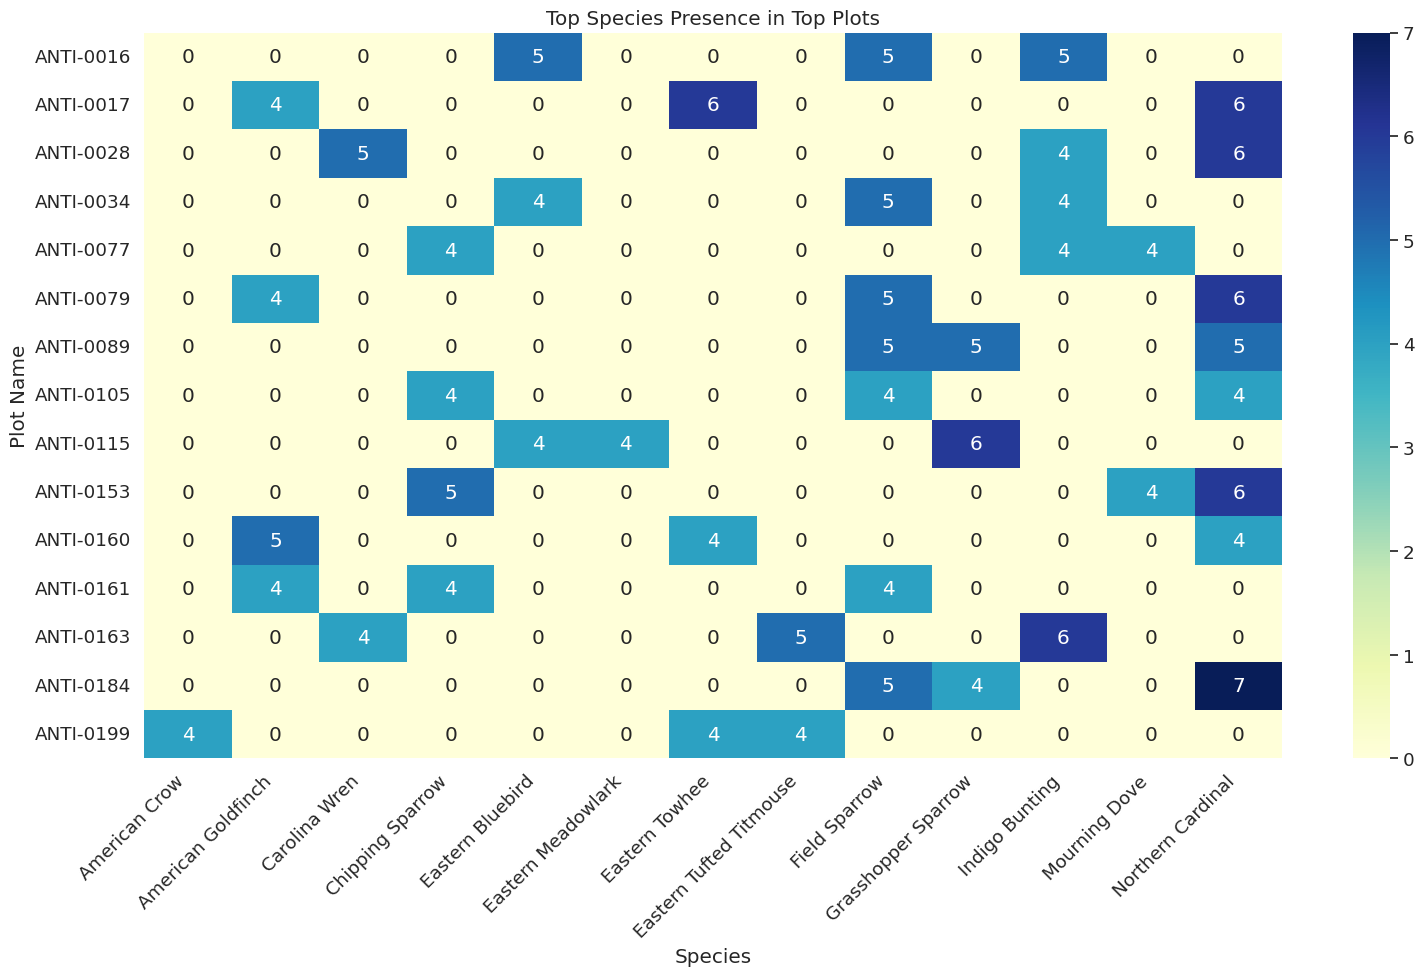

In [ ]:
# Analyze top species in top plots
top_plot_species = top_plot_data.groupby(['Plot_Name', 'Common_Name']).size().reset_index(name='Count')
top_plot_species = top_plot_species.sort_values(['Plot_Name', 'Count'], ascending=[True, False])
top_plot_species = top_plot_species.groupby('Plot_Name').head(3)  # Top 3 species per plot

# Create a heatmap of species presence in top plots
plot_species_pivot = top_plot_species.pivot_table(index='Plot_Name', columns='Common_Name', values='Count', fill_value=0)
plt.figure(figsize=(16, 10))
sns.heatmap(plot_species_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Top Species Presence in Top Plots')
plt.xlabel('Species')
plt.ylabel('Plot Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('species_presence_in_plots.png')
plt.show

# **3. Species Analysis**
Diversity Metrics

In [ ]:
# Overall species diversity by habitat
habitat_diversity = combined_df.groupby('Habitat_Type')['Scientific_Name'].nunique()
print("Species Diversity by Habitat:")
print(habitat_diversity)


Species Diversity by Habitat:
Habitat_Type
Forest       46
Grassland    78
Name: Scientific_Name, dtype: int64


In [ ]:
# Species diversity by location type and habitat
location_habitat_diversity = combined_df.groupby(['Location_Type', 'Habitat_Type'])['Scientific_Name'].nunique().unstack()
print("\nSpecies Diversity by Location Type and Habitat:")
print(location_habitat_diversity)


Species Diversity by Location Type and Habitat:
Habitat_Type   Forest  Grassland
Location_Type                   
forest           46.0        NaN
grassland         NaN       78.0


In [ ]:
# Species overlap between habitats
forest_species = set(combined_df[combined_df['Habitat_Type'] == 'Forest']['Scientific_Name'].unique())
grassland_species = set(combined_df[combined_df['Habitat_Type'] == 'Grassland']['Scientific_Name'].unique())

unique_to_forest = forest_species - grassland_species
unique_to_grassland = grassland_species - forest_species
common_species = forest_species.intersection(grassland_species)

print(f"\nNumber of species unique to Forest: {len(unique_to_forest)}")
print(f"Number of species unique to Grassland: {len(unique_to_grassland)}")
print(f"Number of species common to both habitats: {len(common_species)}")


Number of species unique to Forest: 3
Number of species unique to Grassland: 35
Number of species common to both habitats: 43


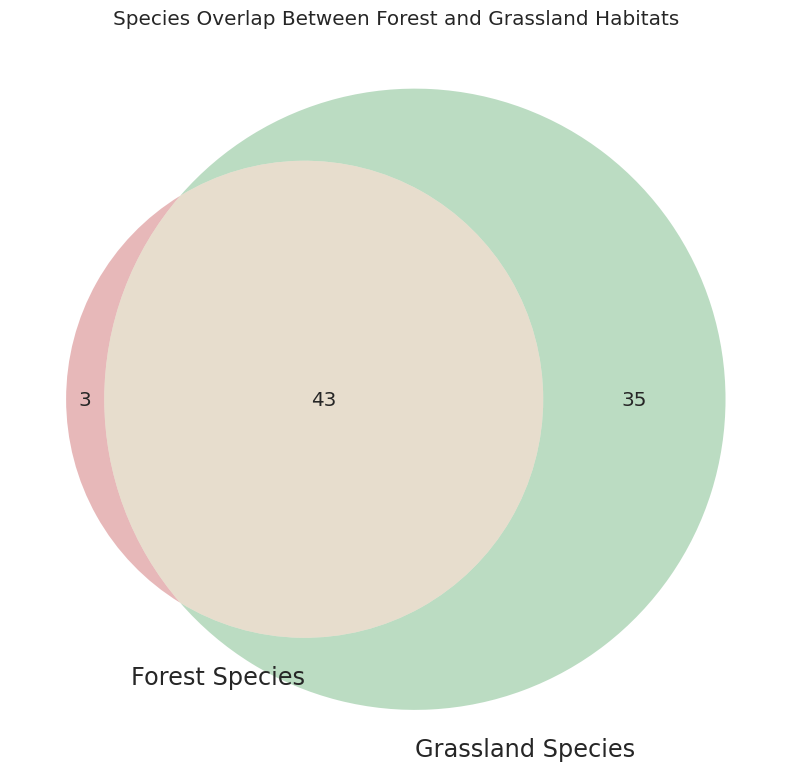

In [ ]:
# Create a Venn diagram to visualize species overlap
from matplotlib_venn import venn2

plt.figure(figsize=(10, 8))
venn2([forest_species, grassland_species], ('Forest Species', 'Grassland Species'))
plt.title('Species Overlap Between Forest and Grassland Habitats')
plt.tight_layout()
plt.savefig('species_overlap_venn.png')
plt.show()


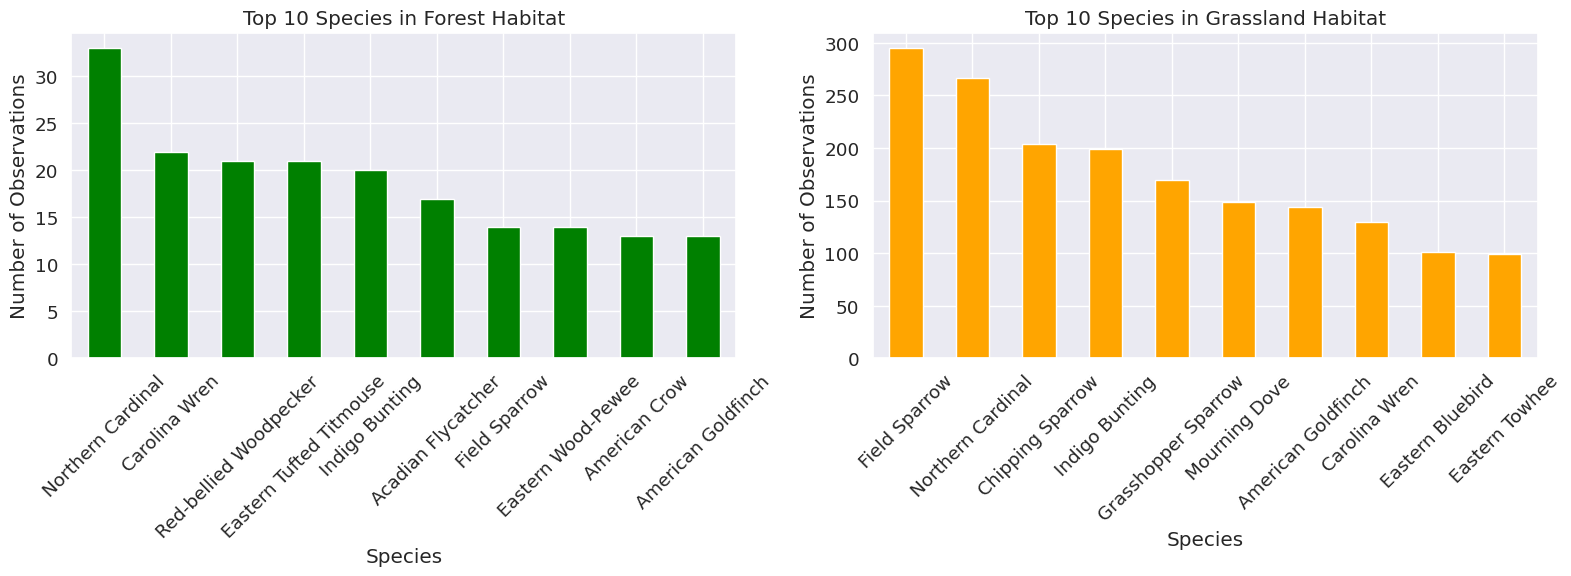

In [ ]:
# Top species by observation count in each habitat
top_forest_species = combined_df[combined_df['Habitat_Type'] == 'Forest']['Common_Name'].value_counts().head(10)
top_grassland_species = combined_df[combined_df['Habitat_Type'] == 'Grassland']['Common_Name'].value_counts().head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

top_forest_species.plot(kind='bar', ax=ax1, color='green')
ax1.set_title('Top 10 Species in Forest Habitat')
ax1.set_xlabel('Species')
ax1.set_ylabel('Number of Observations')
ax1.tick_params(axis='x', rotation=45)

top_grassland_species.plot(kind='bar', ax=ax2, color='orange')
ax2.set_title('Top 10 Species in Grassland Habitat')
ax2.set_xlabel('Species')
ax2.set_ylabel('Number of Observations')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('top_species_by_habitat.png')
plt.show()

**Activity Patterns**

<Figure size 1200x600 with 0 Axes>

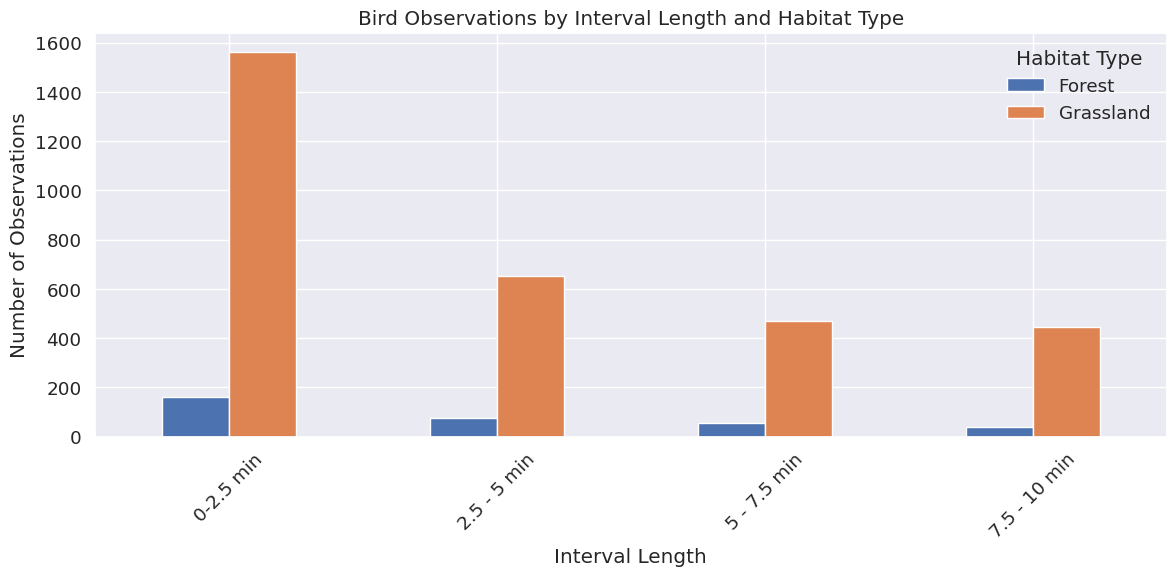

In [ ]:
# Analyze interval length
if 'Interval_Length' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    interval_counts = combined_df.groupby(['Interval_Length', 'Habitat_Type']).size().unstack()
    interval_counts.plot(kind='bar', figsize=(12, 6))
    plt.title('Bird Observations by Interval Length and Habitat Type')
    plt.xlabel('Interval Length')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('observations_by_interval_length.png')
    plt.show()


<Figure size 1200x600 with 0 Axes>

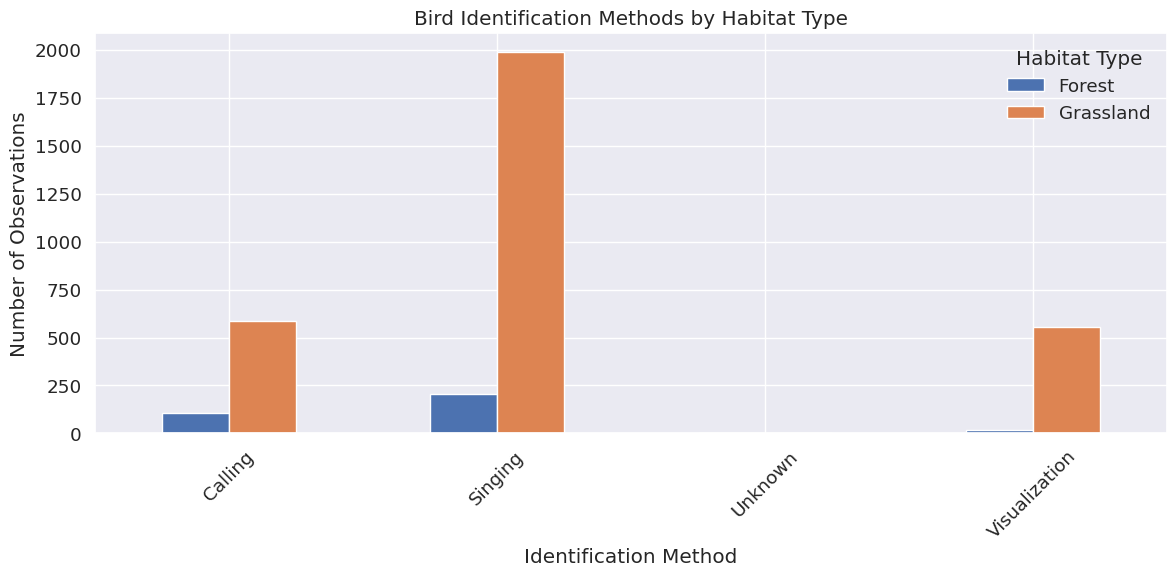

In [ ]:
# Analyze identification methods
if 'ID_Method' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    id_method_counts = combined_df.groupby(['ID_Method', 'Habitat_Type']).size().unstack()
    id_method_counts.plot(kind='bar', figsize=(12, 6))
    plt.title('Bird Identification Methods by Habitat Type')
    plt.xlabel('Identification Method')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('identification_methods_by_habitat.png')
    plt.show()


<Figure size 1400x800 with 0 Axes>

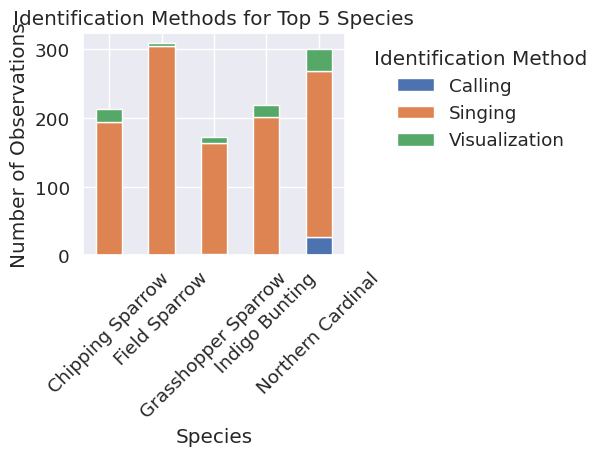

In [ ]:
# Analyze top identification methods for top species
top_5_overall = combined_df['Common_Name'].value_counts().head(5).index.tolist()
top_species_data = combined_df[combined_df['Common_Name'].isin(top_5_overall)]

species_id_method = pd.crosstab(top_species_data['Common_Name'], top_species_data['ID_Method'])
plt.figure(figsize=(14, 8))
species_id_method.plot(kind='bar', stacked=True)
plt.title('Identification Methods for Top 5 Species')
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.legend(title='Identification Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('id_methods_for_top_species.png')
plt.show()

**Sex Ratio**

<Figure size 1000x600 with 0 Axes>

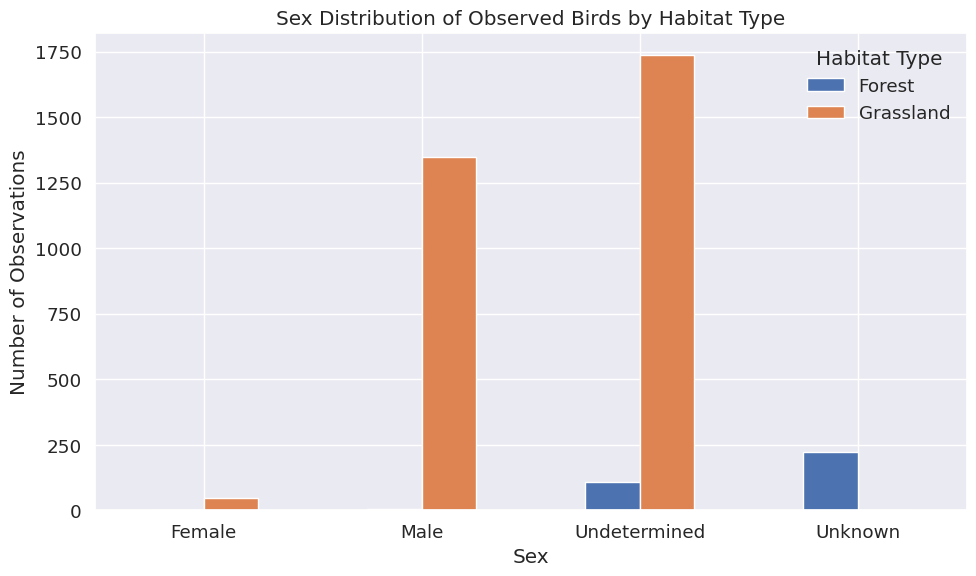

In [ ]:
# Analyze sex distribution overall
if 'Sex' in combined_df.columns:
    plt.figure(figsize=(10, 6))
    sex_counts = combined_df.groupby(['Sex', 'Habitat_Type']).size().unstack()
    sex_counts.plot(kind='bar', figsize=(10, 6))
    plt.title('Sex Distribution of Observed Birds by Habitat Type')
    plt.xlabel('Sex')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=0)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('sex_distribution_by_habitat.png')
    plt.show()



<Figure size 1400x800 with 0 Axes>

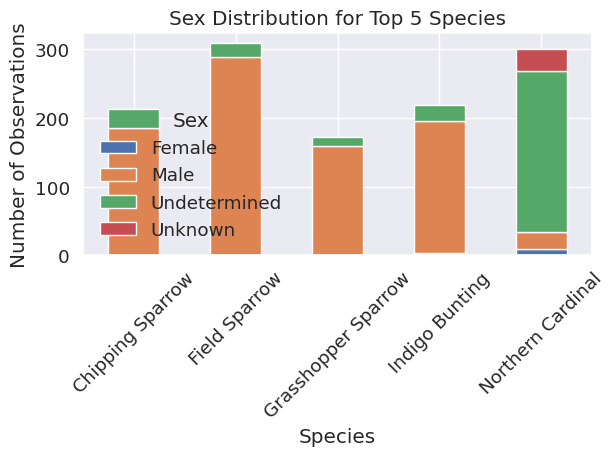

In [ ]:
# Sex distribution by top species
top_5_species = combined_df['Common_Name'].value_counts().head(5).index.tolist()
top_species_sex_data = combined_df[combined_df['Common_Name'].isin(top_5_species)]

species_sex = pd.crosstab(top_species_sex_data['Common_Name'], top_species_sex_data['Sex'])
plt.figure(figsize=(14, 8))
species_sex.plot(kind='bar', stacked=True)
plt.title('Sex Distribution for Top 5 Species')
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.savefig('sex_distribution_for_top_species.png')
plt.show()

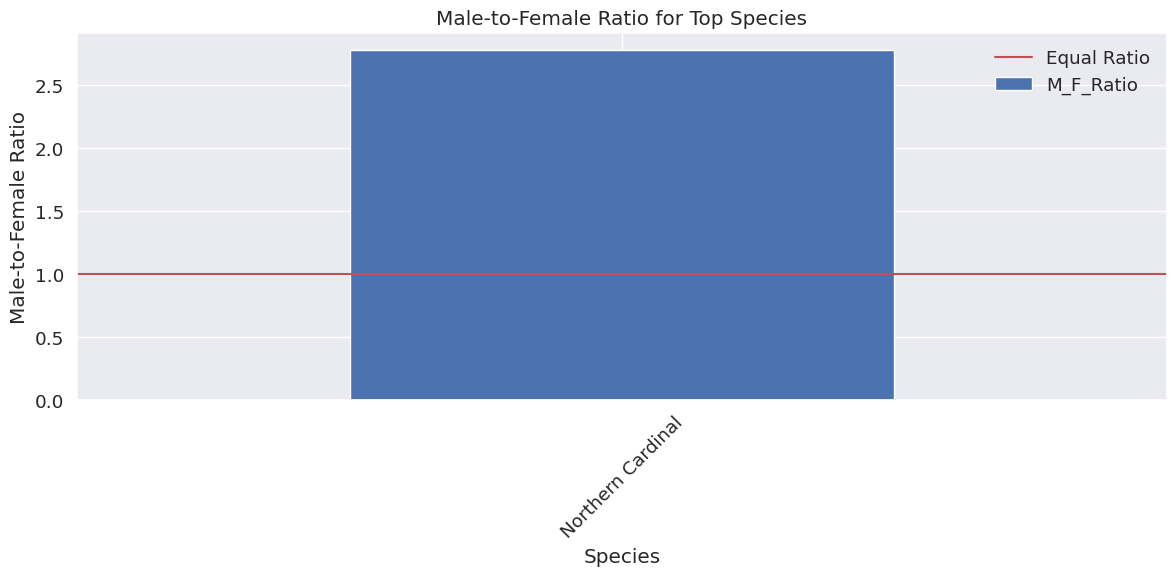

In [ ]:

# Calculate sex ratio for species with sufficient data
species_sex_ratio = top_species_sex_data.groupby(['Common_Name', 'Sex']).size().unstack()
species_sex_ratio = species_sex_ratio.dropna()  # Remove species with missing sex data

# Calculate male-to-female ratio
species_sex_ratio['M_F_Ratio'] = species_sex_ratio['Male'] / species_sex_ratio['Female']
species_sex_ratio = species_sex_ratio.sort_values('M_F_Ratio', ascending=False)

plt.figure(figsize=(12, 6))
species_sex_ratio['M_F_Ratio'].plot(kind='bar')
plt.title('Male-to-Female Ratio for Top Species')
plt.xlabel('Species')
plt.ylabel('Male-to-Female Ratio')
plt.axhline(y=1, color='r', linestyle='-', label='Equal Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('male_female_ratio.png')
plt.show()

# **4. Environmental Conditions**
Weather Correlation

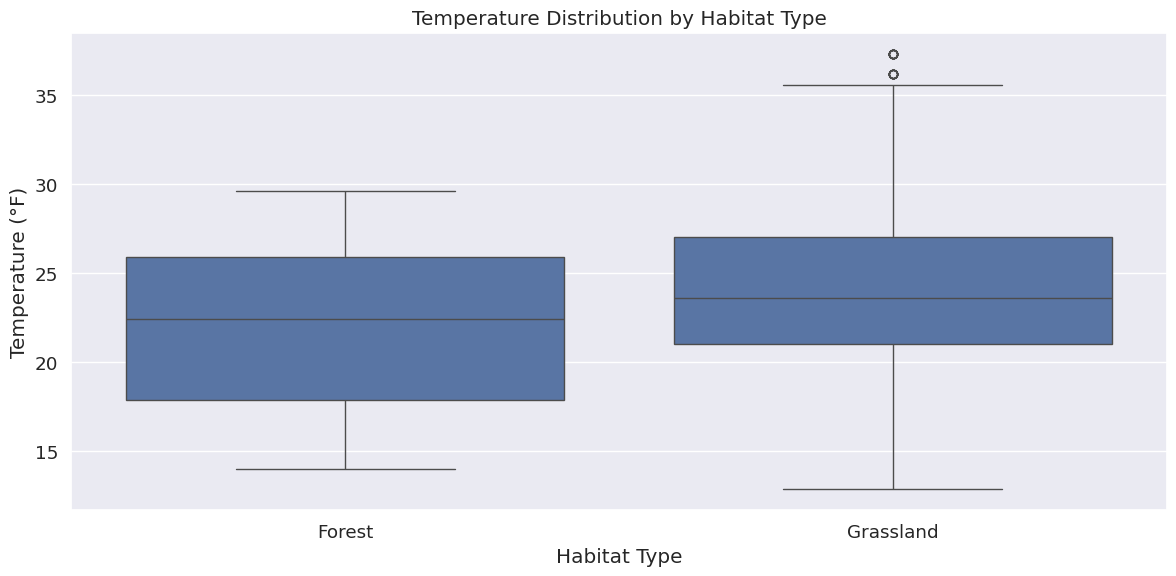

In [ ]:
# Temperature distribution by habitat
if 'Temperature' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Habitat_Type', y='Temperature', data=combined_df)
    plt.title('Temperature Distribution by Habitat Type')
    plt.xlabel('Habitat Type')
    plt.ylabel('Temperature (°F)')
    plt.tight_layout()
    plt.savefig('temperature_distribution_by_habitat.png')
    plt.show()


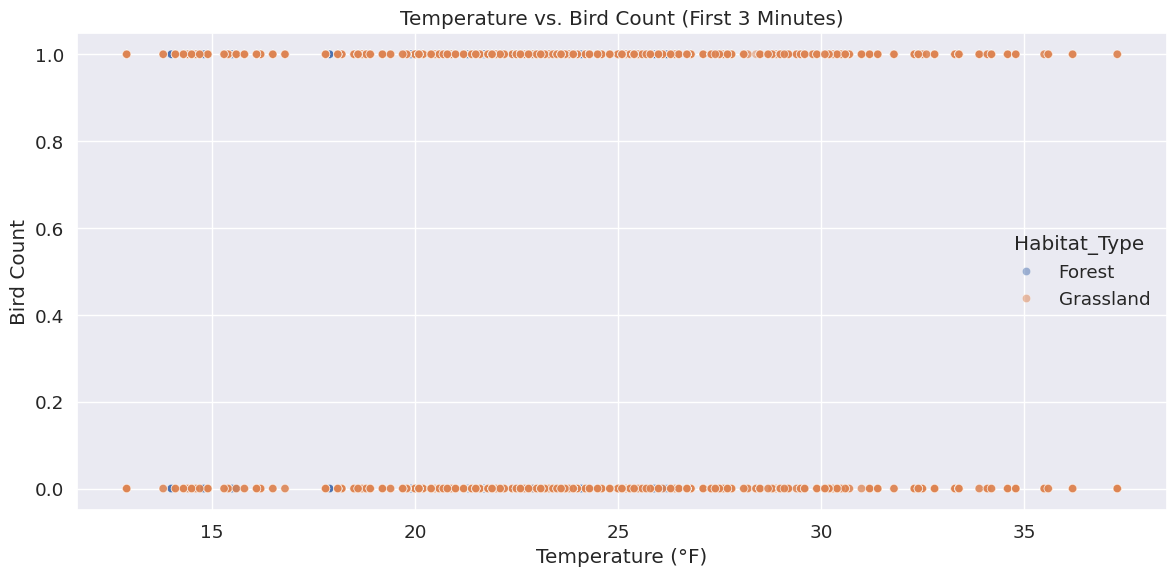

Correlation between Temperature and Bird Count in Forest: -0.028
Correlation between Temperature and Bird Count in Grassland: -0.051


In [ ]:
# Temperature vs. bird count
if 'Initial_Three_Min_Cnt' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Temperature', y='Initial_Three_Min_Cnt', hue='Habitat_Type', data=combined_df, alpha=0.5)
    plt.title('Temperature vs. Bird Count (First 3 Minutes)')
    plt.xlabel('Temperature (°F)')
    plt.ylabel('Bird Count')
    plt.tight_layout()
    plt.savefig('temperature_vs_bird_count.png')
    plt.show()

    # Calculate correlation between temperature and bird count
    temp_corr_forest = combined_df[combined_df['Habitat_Type'] == 'Forest'][['Temperature', 'Initial_Three_Min_Cnt']].corr().iloc[0, 1]
    temp_corr_grassland = combined_df[combined_df['Habitat_Type'] == 'Grassland'][['Temperature', 'Initial_Three_Min_Cnt']].corr().iloc[0, 1]

    print(f"Correlation between Temperature and Bird Count in Forest: {temp_corr_forest:.3f}")
    print(f"Correlation between Temperature and Bird Count in Grassland: {temp_corr_grassland:.3f}")

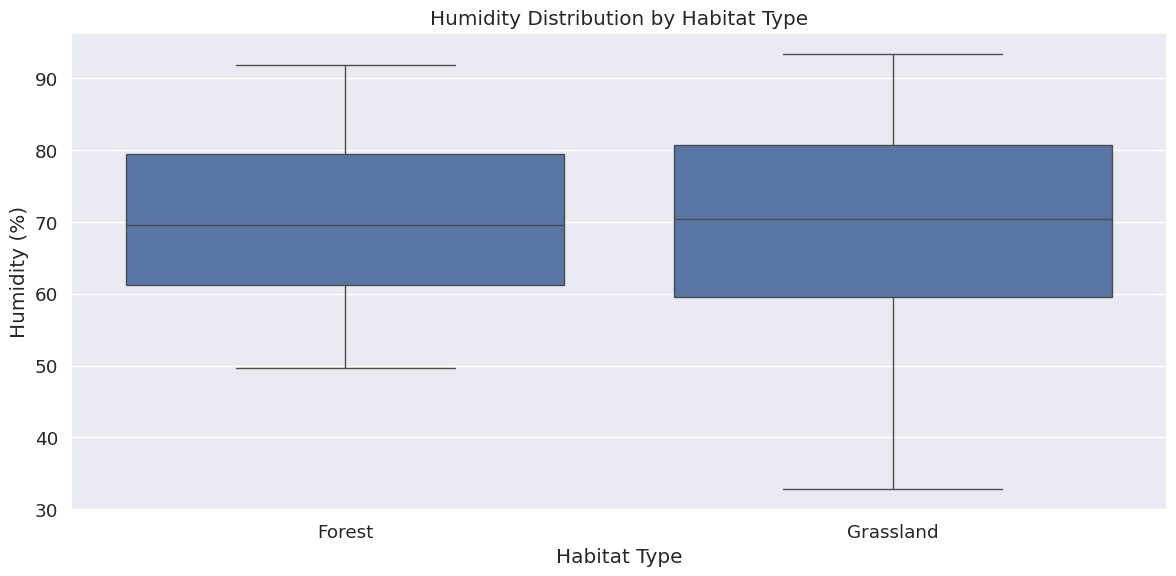

In [ ]:
# Humidity distribution by habitat
if 'Humidity' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Habitat_Type', y='Humidity', data=combined_df)
    plt.title('Humidity Distribution by Habitat Type')
    plt.xlabel('Habitat Type')
    plt.ylabel('Humidity (%)')
    plt.tight_layout()
    plt.savefig('humidity_distribution_by_habitat.png')
    plt.show()

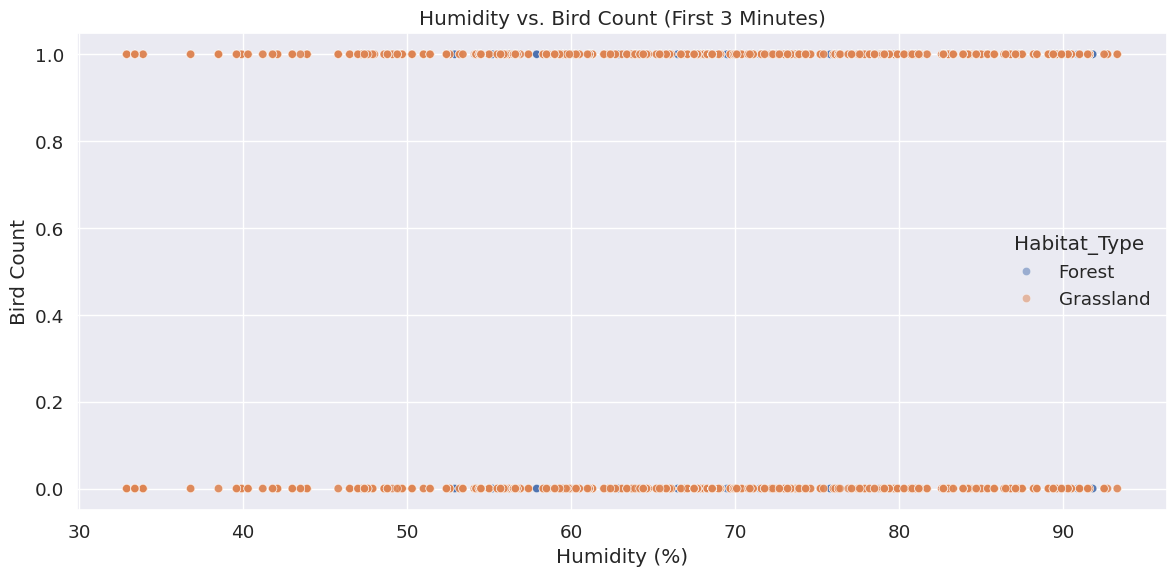

Correlation between Humidity and Bird Count in Forest: 0.025
Correlation between Humidity and Bird Count in Grassland: 0.061


In [ ]:
 # Humidity vs. bird count
if 'Initial_Three_Min_Cnt' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Humidity', y='Initial_Three_Min_Cnt', hue='Habitat_Type', data=combined_df, alpha=0.5)
    plt.title('Humidity vs. Bird Count (First 3 Minutes)')
    plt.xlabel('Humidity (%)')
    plt.ylabel('Bird Count')
    plt.tight_layout()
    plt.savefig('humidity_vs_bird_count.png')
    plt.show()

    # Calculate correlation between humidity and bird count
    humidity_corr_forest = combined_df[combined_df['Habitat_Type'] == 'Forest'][['Humidity', 'Initial_Three_Min_Cnt']].corr().iloc[0, 1]
    humidity_corr_grassland = combined_df[combined_df['Habitat_Type'] == 'Grassland'][['Humidity', 'Initial_Three_Min_Cnt']].corr().iloc[0, 1]

    print(f"Correlation between Humidity and Bird Count in Forest: {humidity_corr_forest:.3f}")
    print(f"Correlation between Humidity and Bird Count in Grassland: {humidity_corr_grassland:.3f}")


<Figure size 1400x700 with 0 Axes>

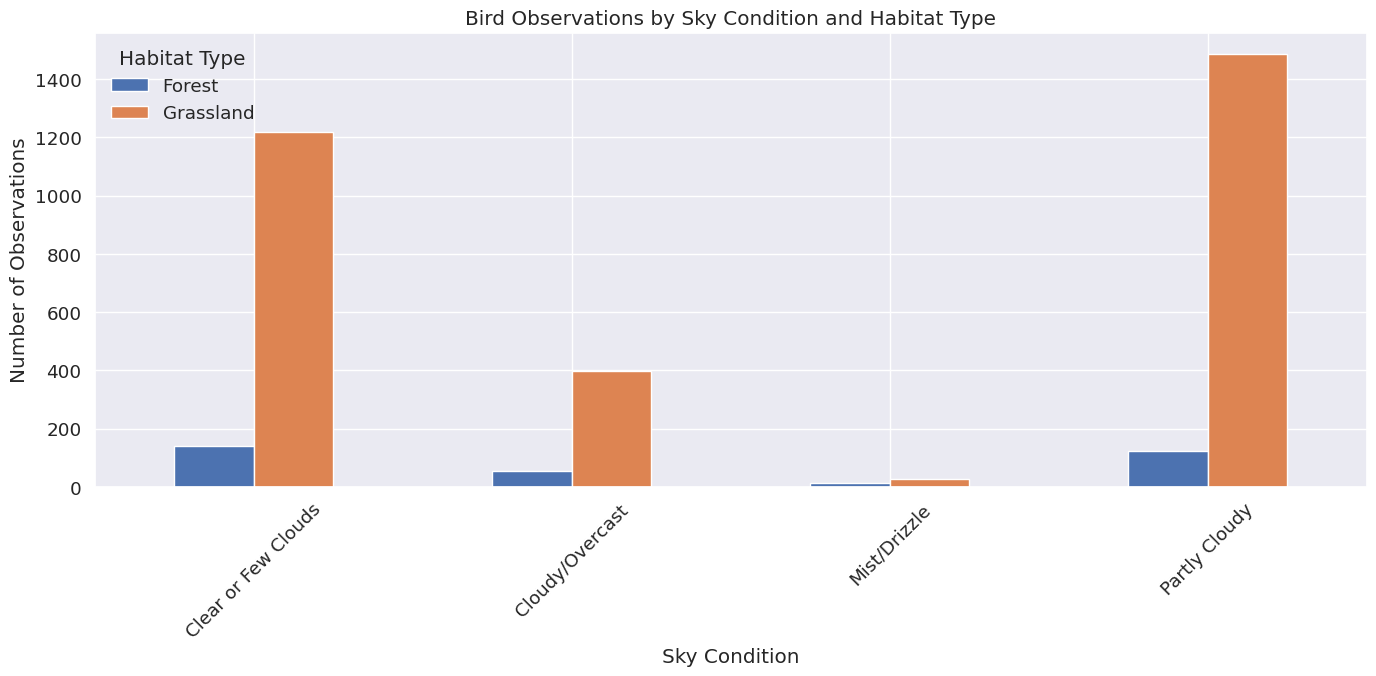

In [ ]:

# Sky conditions by habitat
if 'Sky' in combined_df.columns:
    # Get top sky conditions
    top_sky = combined_df['Sky'].value_counts().head(10).index.tolist()
    sky_data = combined_df[combined_df['Sky'].isin(top_sky)]

    plt.figure(figsize=(14, 7))
    sky_counts = sky_data.groupby(['Sky', 'Habitat_Type']).size().unstack()
    sky_counts.plot(kind='bar', figsize=(14, 7))
    plt.title('Bird Observations by Sky Condition and Habitat Type')
    plt.xlabel('Sky Condition')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('observations_by_sky_condition.png')
    plt.show()

<Figure size 1400x700 with 0 Axes>

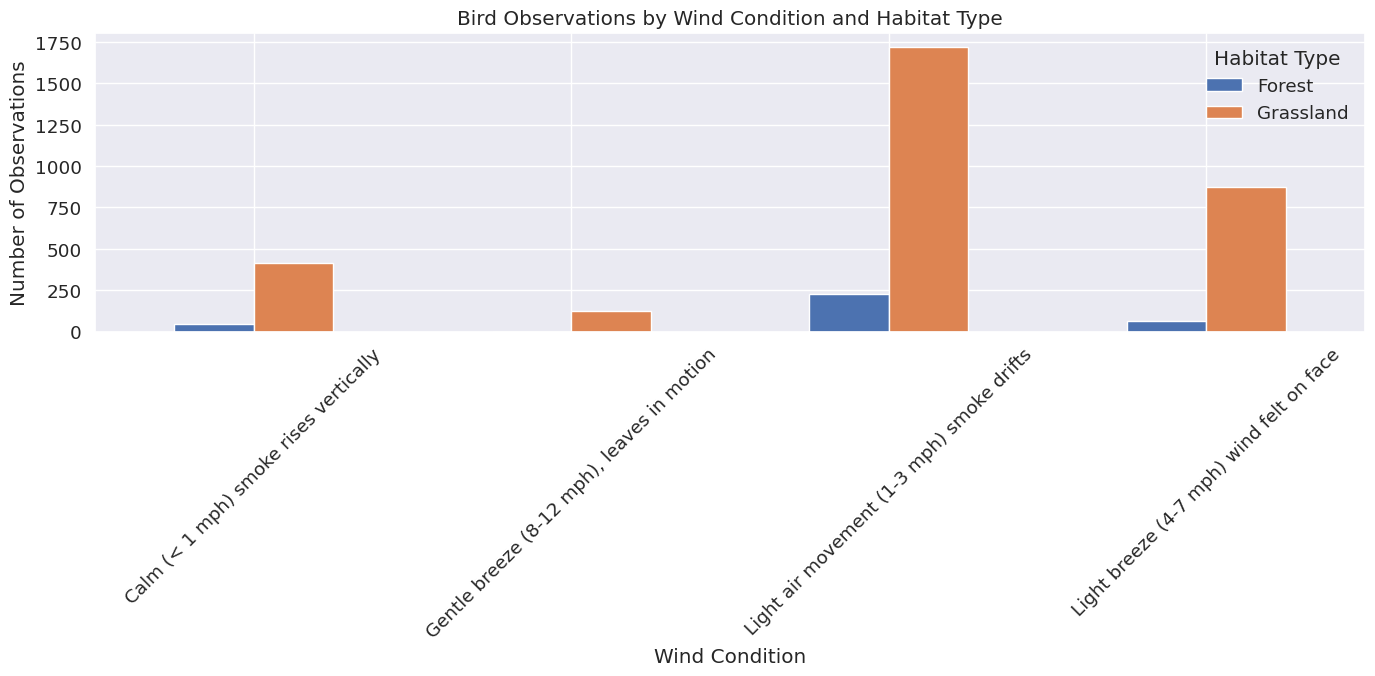

In [ ]:

# Wind conditions by habitat
if 'Wind' in combined_df.columns:
    # Get top wind conditions
    top_wind = combined_df['Wind'].value_counts().head(10).index.tolist()
    wind_data = combined_df[combined_df['Wind'].isin(top_wind)]

    plt.figure(figsize=(14, 7))
    wind_counts = wind_data.groupby(['Wind', 'Habitat_Type']).size().unstack()
    wind_counts.plot(kind='bar', figsize=(14, 7))
    plt.title('Bird Observations by Wind Condition and Habitat Type')
    plt.xlabel('Wind Condition')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('observations_by_wind_condition.png')
    plt.show()

**Disturbance Effect**

<Figure size 1400x700 with 0 Axes>

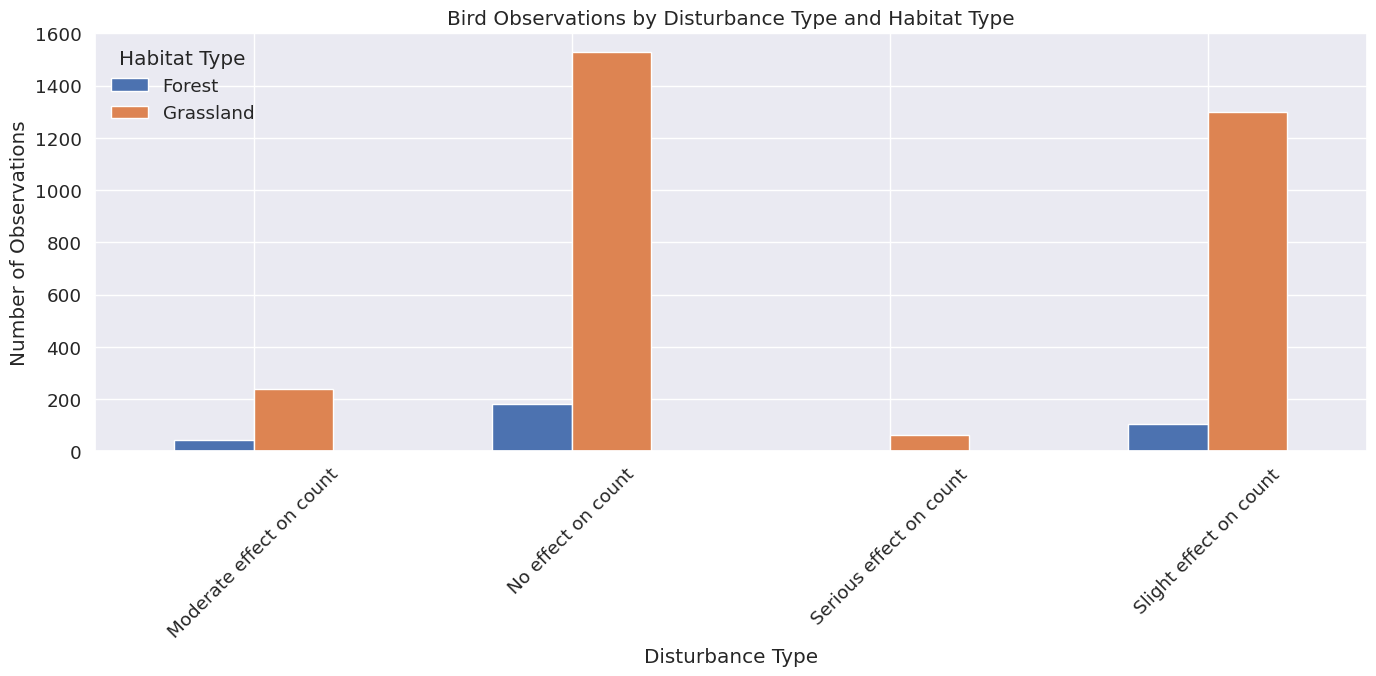

<Figure size 1400x700 with 0 Axes>

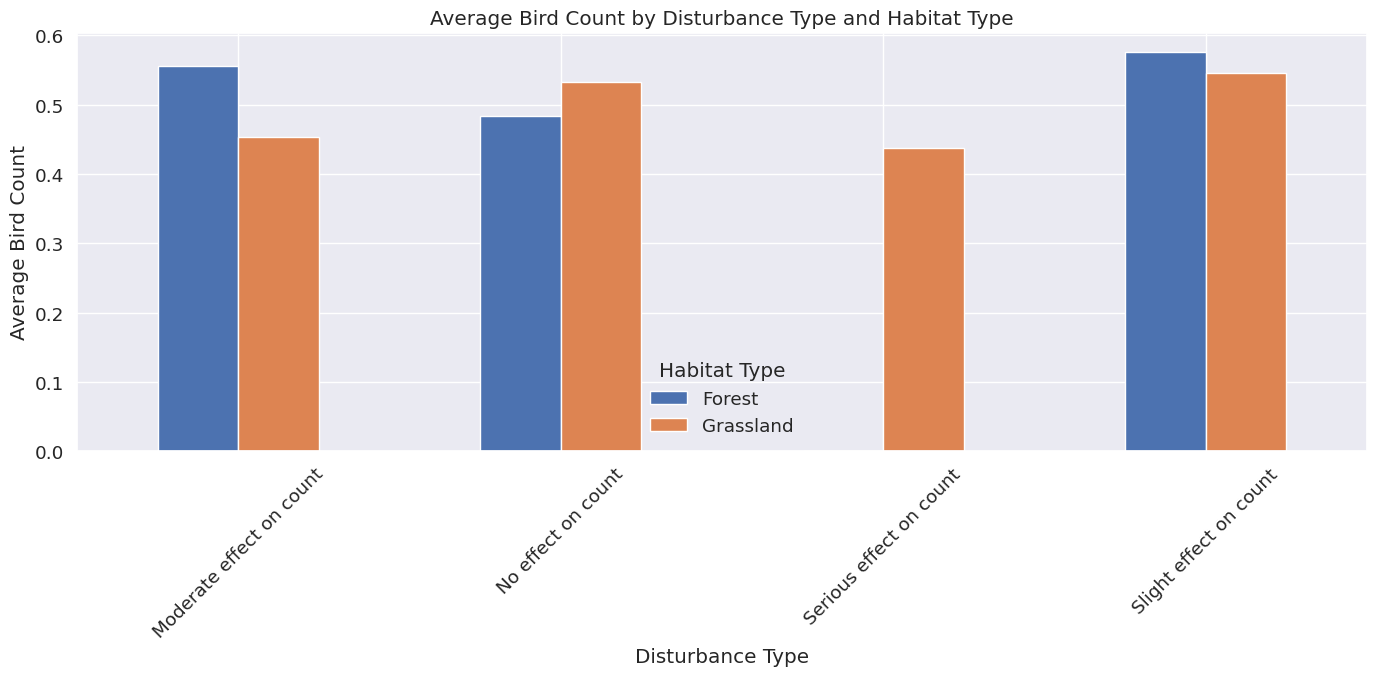

In [ ]:
# Analyze disturbance effects
if 'Disturbance' in combined_df.columns:
    # Get top disturbance types
    top_disturbance = combined_df['Disturbance'].value_counts().head(10).index.tolist()
    disturbance_data = combined_df[combined_df['Disturbance'].isin(top_disturbance)]

    plt.figure(figsize=(14, 7))
    disturbance_counts = disturbance_data.groupby(['Disturbance', 'Habitat_Type']).size().unstack()
    disturbance_counts.plot(kind='bar', figsize=(14, 7))
    plt.title('Bird Observations by Disturbance Type and Habitat Type')
    plt.xlabel('Disturbance Type')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('observations_by_disturbance.png')
    plt.show()

    # Bird count by disturbance level
    if 'Initial_Three_Min_Cnt' in combined_df.columns:
        disturbance_bird_count = disturbance_data.groupby(['Disturbance', 'Habitat_Type'])['Initial_Three_Min_Cnt'].mean().unstack()

        plt.figure(figsize=(14, 7))
        disturbance_bird_count.plot(kind='bar', figsize=(14, 7))
        plt.title('Average Bird Count by Disturbance Type and Habitat Type')
        plt.xlabel('Disturbance Type')
        plt.ylabel('Average Bird Count')
        plt.xticks(rotation=45)
        plt.legend(title='Habitat Type')
        plt.tight_layout()
        plt.savefig('bird_count_by_disturbance.png')
        plt.show()

# **5. Distance and Behavior**
Distance Analysis

<Figure size 1200x600 with 0 Axes>

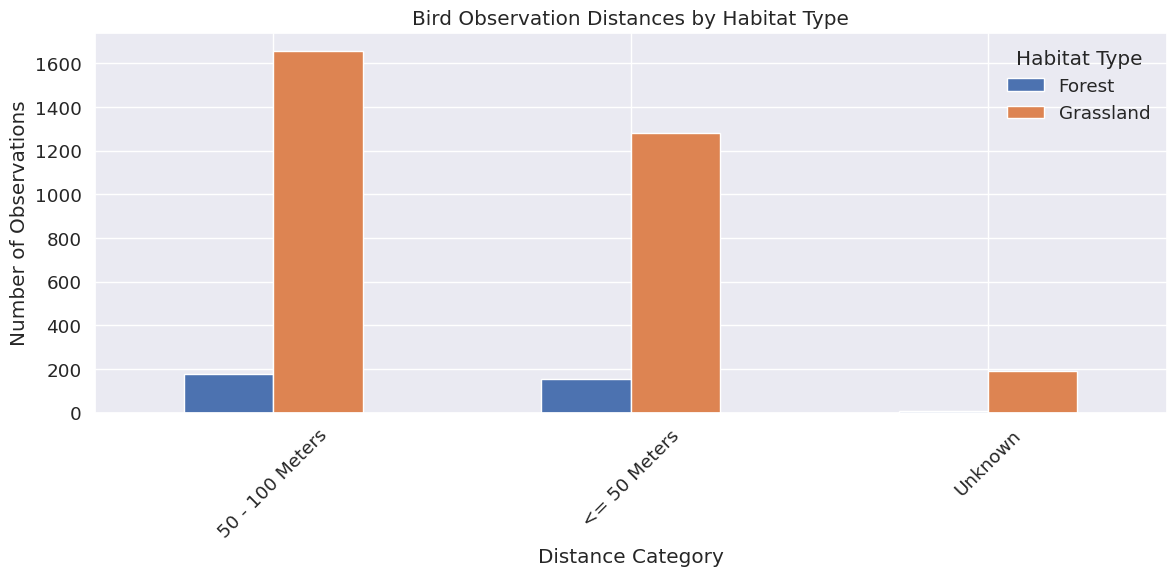

In [ ]:
# Analyze observation distances
if 'Distance' in combined_df.columns:
    plt.figure(figsize=(12, 6))
    distance_counts = combined_df.groupby(['Distance', 'Habitat_Type']).size().unstack()
    distance_counts.plot(kind='bar', figsize=(12, 6))
    plt.title('Bird Observation Distances by Habitat Type')
    plt.xlabel('Distance Category')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('observation_distances_by_habitat.png')
    plt.show()


<Figure size 1400x800 with 0 Axes>

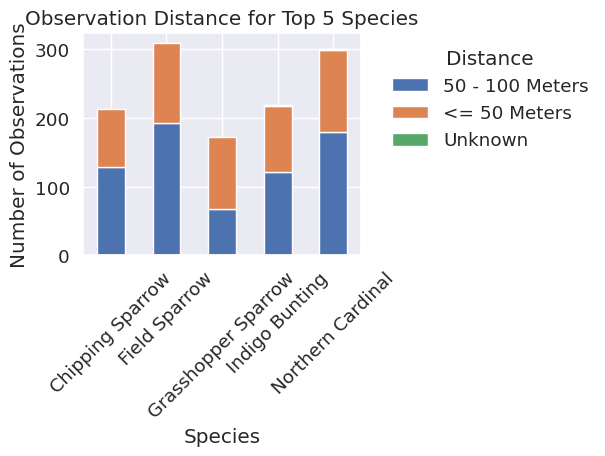

In [ ]:
# Distance by top species
top_5_species = combined_df['Common_Name'].value_counts().head(5).index.tolist()
top_species_distance = combined_df[combined_df['Common_Name'].isin(top_5_species)]

species_distance = pd.crosstab(top_species_distance['Common_Name'], top_species_distance['Distance'])
plt.figure(figsize=(14, 8))
species_distance.plot(kind='bar', stacked=True)
plt.title('Observation Distance for Top 5 Species')
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.legend(title='Distance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('distance_for_top_species.png')
plt.show()



Average Observation Distance by Habitat:
Habitat_Type
Forest       63.414634
Grassland    64.098639
Name: Distance_Numeric, dtype: float64


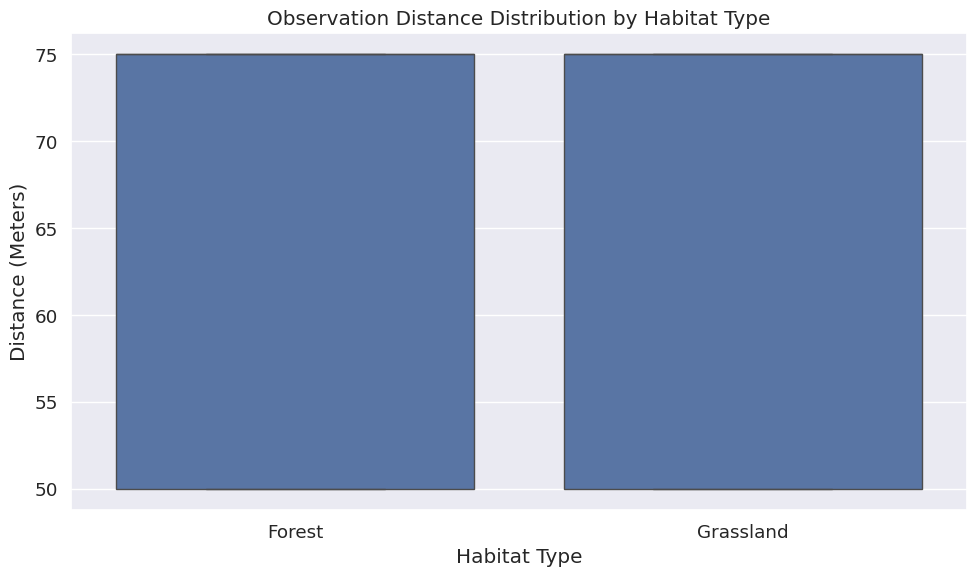

In [ ]:
# Average distance by habitat
# Convert distance to numerical values for analysis
def distance_to_numeric(distance_str):
    if pd.isna(distance_str) or distance_str == 'Unknown':
        return None

    try:
        if '<=' in str(distance_str):
            return float(str(distance_str).split('<=')[1].split()[0])
        elif '>' in str(distance_str):
            return float(str(distance_str).split('>')[1].split()[0])
        elif '-' in str(distance_str):
            parts = str(distance_str).split('-')
            lower = float(parts[0].split()[-1])
            upper = float(parts[1].split()[0])
            return (lower + upper) / 2
        else:
            return None
    except:
        return None

combined_df['Distance_Numeric'] = combined_df['Distance'].apply(distance_to_numeric)

# Calculate average distance by habitat
avg_distance = combined_df.groupby('Habitat_Type')['Distance_Numeric'].mean()
print("\nAverage Observation Distance by Habitat:")
print(avg_distance)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Habitat_Type', y='Distance_Numeric', data=combined_df)
plt.title('Observation Distance Distribution by Habitat Type')
plt.xlabel('Habitat Type')
plt.ylabel('Distance (Meters)')
plt.tight_layout()
plt.savefig('distance_distribution_by_habitat.png')
plt.show()

**Flyover Frequency**

<Figure size 1000x600 with 0 Axes>

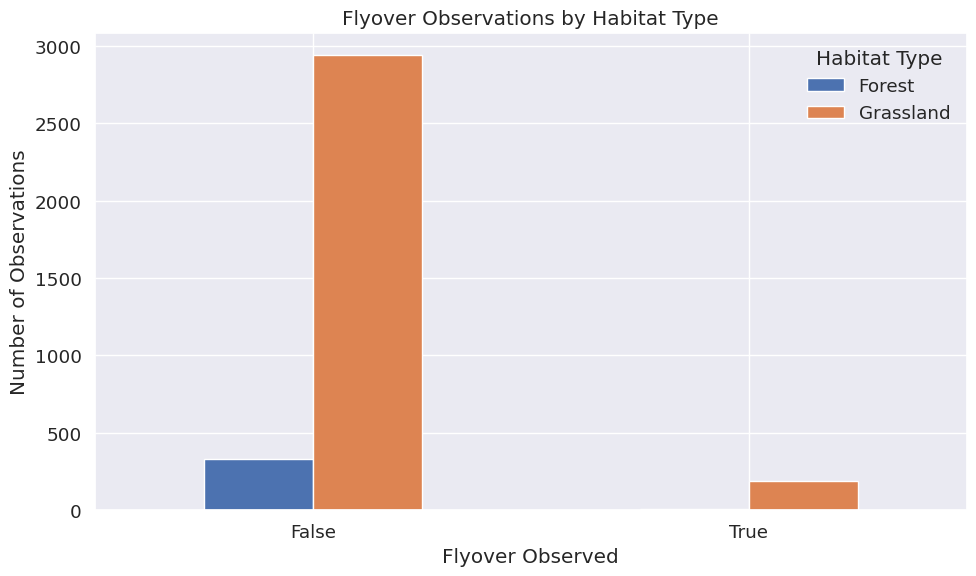

<Figure size 1000x600 with 0 Axes>

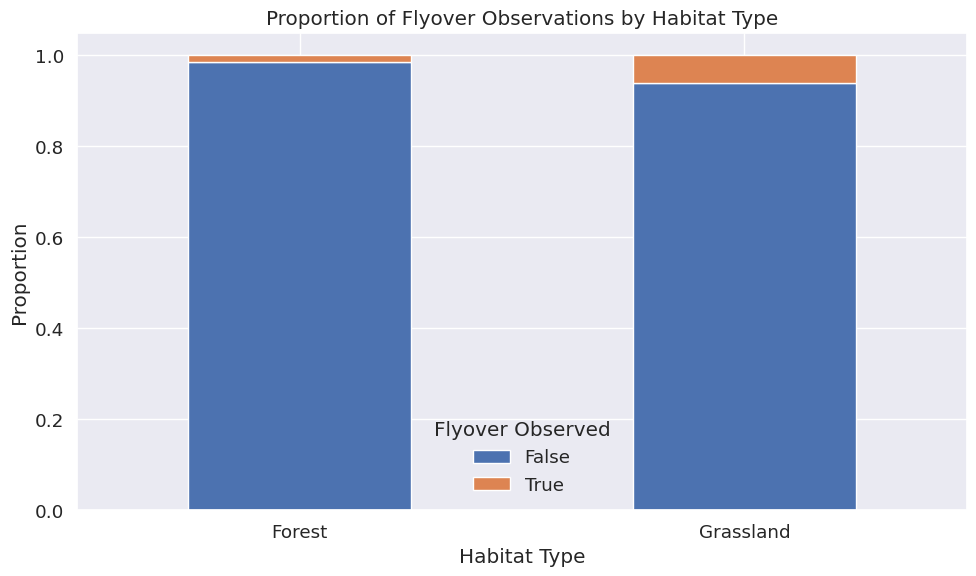

<Figure size 1400x800 with 0 Axes>

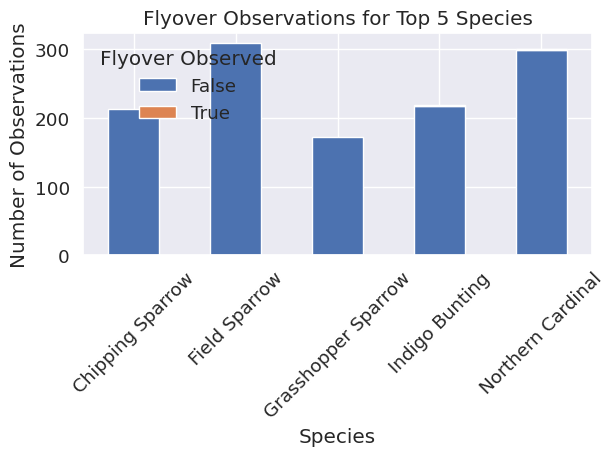

In [ ]:
# Analyze flyover observations
if 'Flyover_Observed' in combined_df.columns:
    plt.figure(figsize=(10, 6))
    flyover_counts = combined_df.groupby(['Flyover_Observed', 'Habitat_Type']).size().unstack()
    flyover_counts.plot(kind='bar', figsize=(10, 6))
    plt.title('Flyover Observations by Habitat Type')
    plt.xlabel('Flyover Observed')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=0)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('flyover_by_habitat.png')
    plt.show()

    # Calculate proportion of flyovers by habitat
    flyover_prop = combined_df.groupby(['Habitat_Type', 'Flyover_Observed']).size().unstack()
    flyover_prop = flyover_prop.div(flyover_prop.sum(axis=1), axis=0)

    plt.figure(figsize=(10, 6))
    flyover_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Proportion of Flyover Observations by Habitat Type')
    plt.xlabel('Habitat Type')
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.legend(title='Flyover Observed')
    plt.tight_layout()
    plt.savefig('flyover_proportion_by_habitat.png')
    plt.show()

    # Flyover by top species
    top_5_species = combined_df['Common_Name'].value_counts().head(5).index.tolist()
    top_species_flyover = combined_df[combined_df['Common_Name'].isin(top_5_species)]

    species_flyover = pd.crosstab(top_species_flyover['Common_Name'], top_species_flyover['Flyover_Observed'])
    plt.figure(figsize=(14, 8))
    species_flyover.plot(kind='bar', stacked=True)
    plt.title('Flyover Observations for Top 5 Species')
    plt.xlabel('Species')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    plt.legend(title='Flyover Observed')
    plt.tight_layout()
    plt.savefig('flyover_for_top_species.png')
    plt.show()

# **6. Observer Trends**
Observer Bias

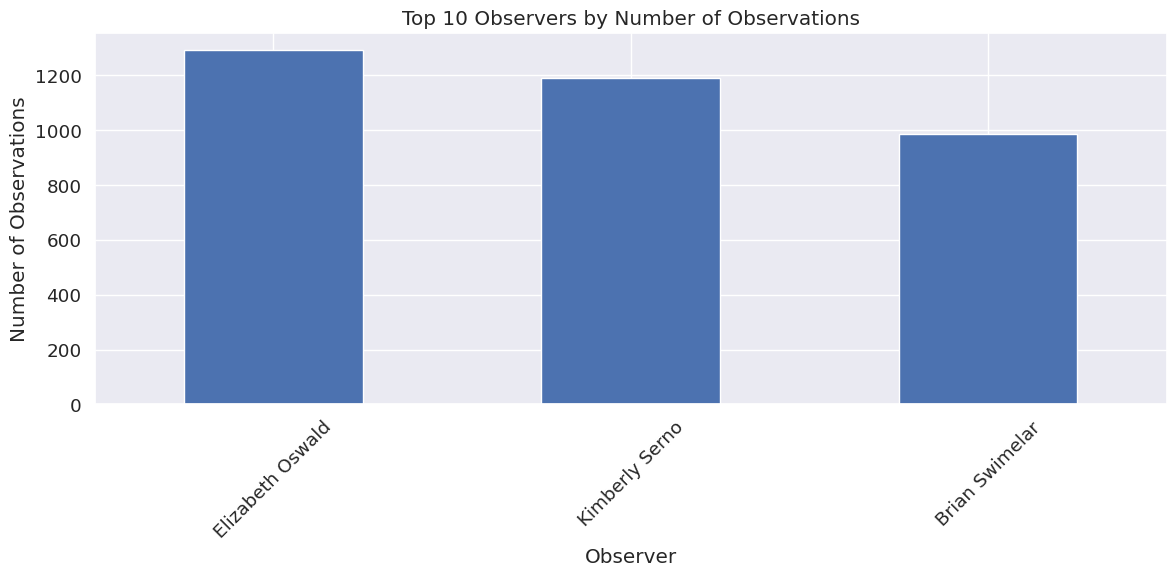

<Figure size 1200x600 with 0 Axes>

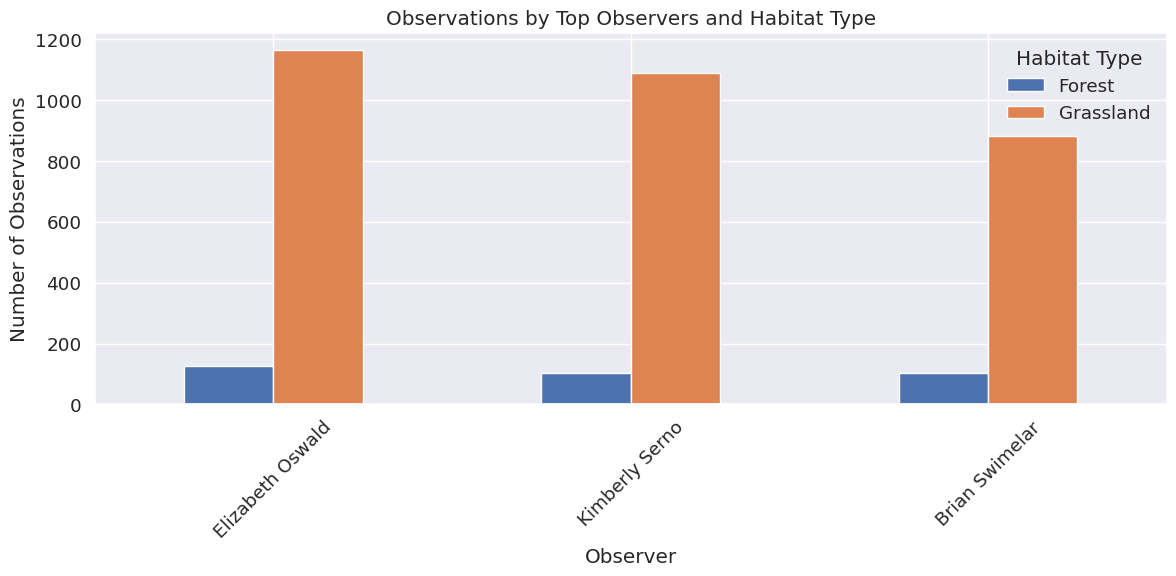

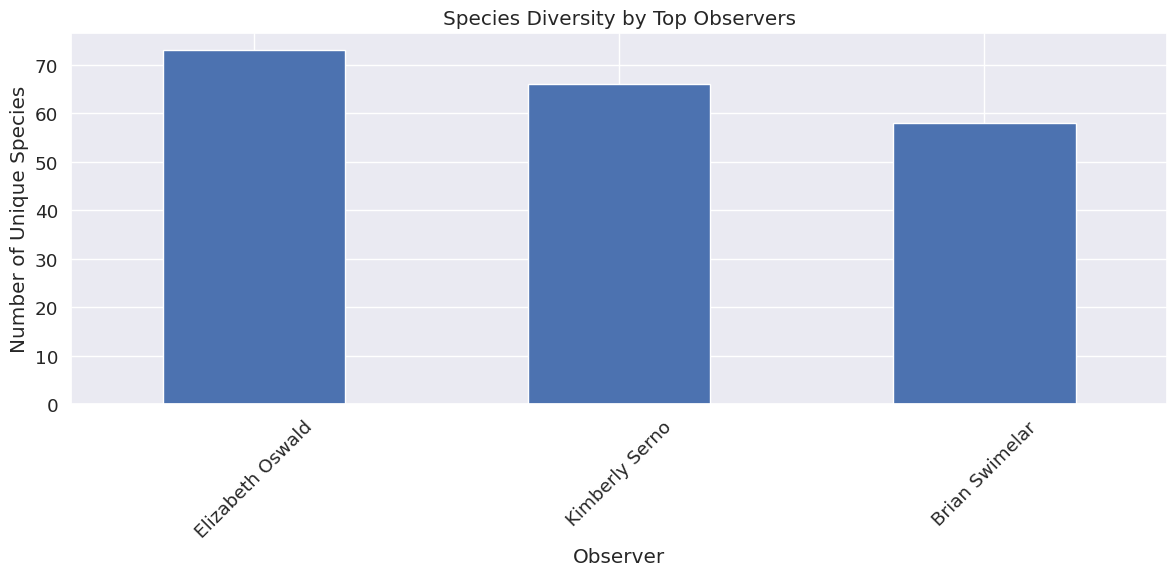

<Figure size 1200x600 with 0 Axes>

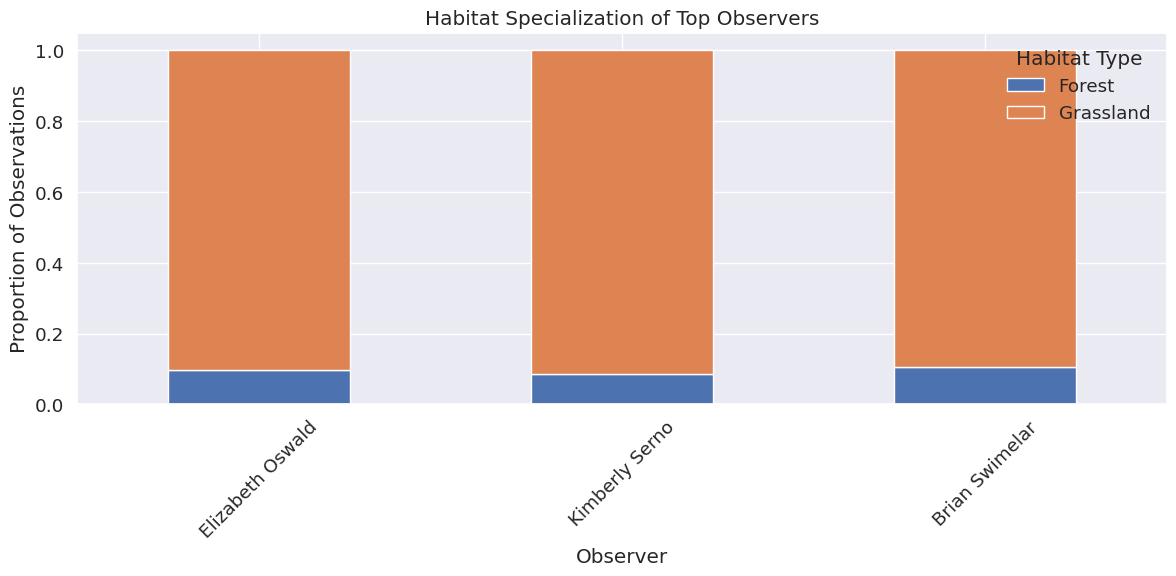

In [ ]:
# Analyze observer patterns
if 'Observer' in combined_df.columns:
    # Top observers by number of observations
    top_observers = combined_df['Observer'].value_counts().head(10)

    plt.figure(figsize=(12, 6))
    top_observers.plot(kind='bar')
    plt.title('Top 10 Observers by Number of Observations')
    plt.xlabel('Observer')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('top_observers.png')
    plt.show()

    # Observer activity by habitat
    observer_habitat = combined_df.groupby(['Observer', 'Habitat_Type']).size().unstack()
    # Filter to top observers for better visualization
    top_observer_names = top_observers.index.tolist()
    top_observer_habitat = observer_habitat.loc[top_observer_names]

    plt.figure(figsize=(12, 6))
    top_observer_habitat.plot(kind='bar', figsize=(12, 6))
    plt.title('Observations by Top Observers and Habitat Type')
    plt.xlabel('Observer')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('observations_by_top_observers.png')
    plt.show()

    # Species diversity by top observers
    observer_diversity = combined_df.groupby('Observer')['Scientific_Name'].nunique().sort_values(ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    observer_diversity.plot(kind='bar')
    plt.title('Species Diversity by Top Observers')
    plt.xlabel('Observer')
    plt.ylabel('Number of Unique Species')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('observer_diversity.png')
    plt.show()

    # Observer specialization - do some observers focus on specific habitats?
    observer_habitat_ratio = observer_habitat.div(observer_habitat.sum(axis=1), axis=0)
    top_observer_specialization = observer_habitat_ratio.loc[top_observer_names]

    plt.figure(figsize=(12, 6))
    top_observer_specialization.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Habitat Specialization of Top Observers')
    plt.xlabel('Observer')
    plt.ylabel('Proportion of Observations')
    plt.xticks(rotation=45)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('observer_specialization.png')
    plt.show()

**Visit Patterns**

<Figure size 1200x600 with 0 Axes>

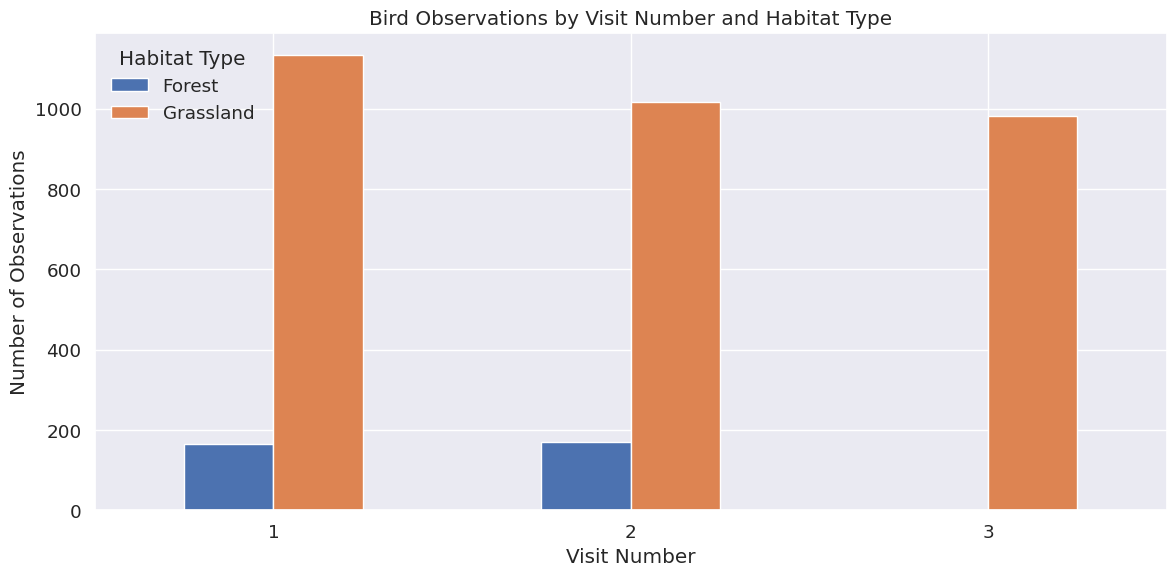

<Figure size 1200x600 with 0 Axes>

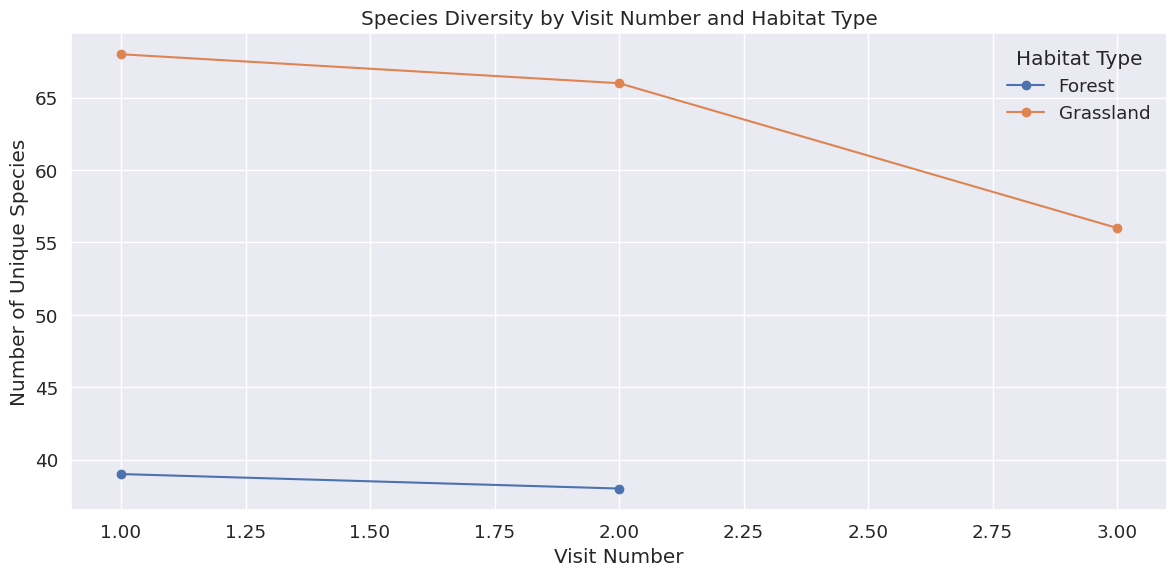

<Figure size 1200x600 with 0 Axes>

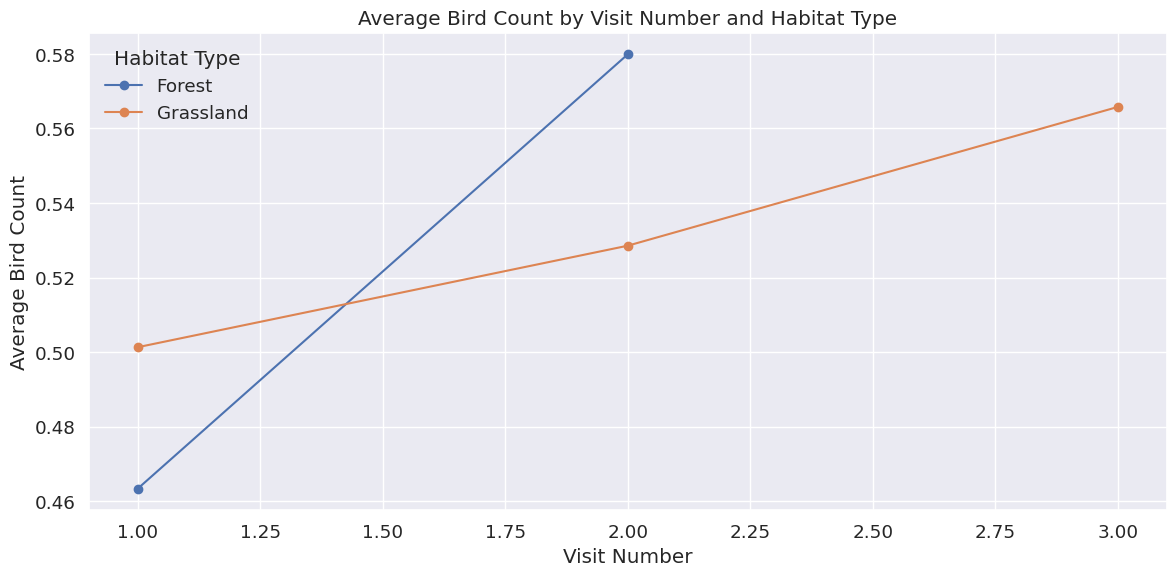

In [ ]:
# Analyze visit patterns
if 'Visit' in combined_df.columns:
    # Observations by visit number
    plt.figure(figsize=(12, 6))
    visit_counts = combined_df.groupby(['Visit', 'Habitat_Type']).size().unstack()
    visit_counts.plot(kind='bar', figsize=(12, 6))
    plt.title('Bird Observations by Visit Number and Habitat Type')
    plt.xlabel('Visit Number')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=0)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('observations_by_visit.png')
    plt.show()

    # Species diversity by visit number
    visit_diversity = combined_df.groupby(['Visit', 'Habitat_Type'])['Scientific_Name'].nunique().unstack()

    plt.figure(figsize=(12, 6))
    visit_diversity.plot(kind='line', marker='o', figsize=(12, 6))
    plt.title('Species Diversity by Visit Number and Habitat Type')
    plt.xlabel('Visit Number')
    plt.ylabel('Number of Unique Species')
    plt.grid(True)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('diversity_by_visit.png')
    plt.show()

    # Bird count by visit number
    if 'Initial_Three_Min_Cnt' in combined_df.columns:
        visit_bird_count = combined_df.groupby(['Visit', 'Habitat_Type'])['Initial_Three_Min_Cnt'].mean().unstack()

        plt.figure(figsize=(12, 6))
        visit_bird_count.plot(kind='line', marker='o', figsize=(12, 6))
        plt.title('Average Bird Count by Visit Number and Habitat Type')
        plt.xlabel('Visit Number')
        plt.ylabel('Average Bird Count')
        plt.grid(True)
        plt.legend(title='Habitat Type')
        plt.tight_layout()
        plt.savefig('bird_count_by_visit.png')
        plt.show()

# **7. Conservation Insights**
Watchlist Trends

<Figure size 1000x600 with 0 Axes>

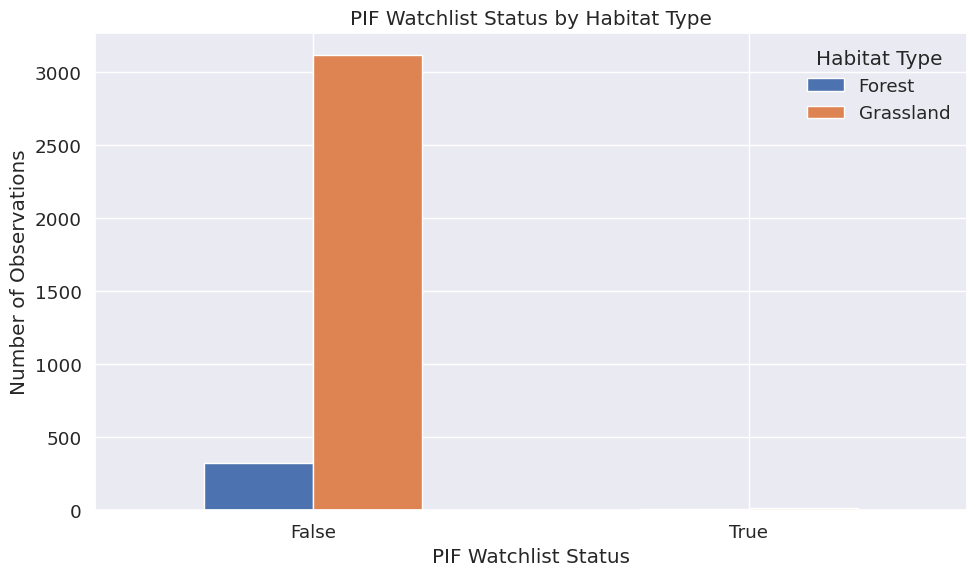

<Figure size 1000x600 with 0 Axes>

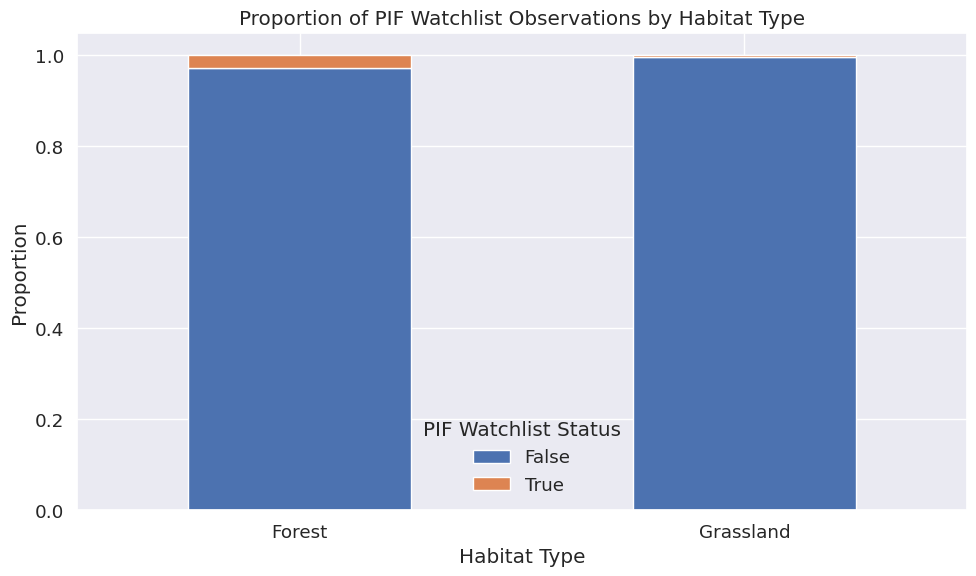

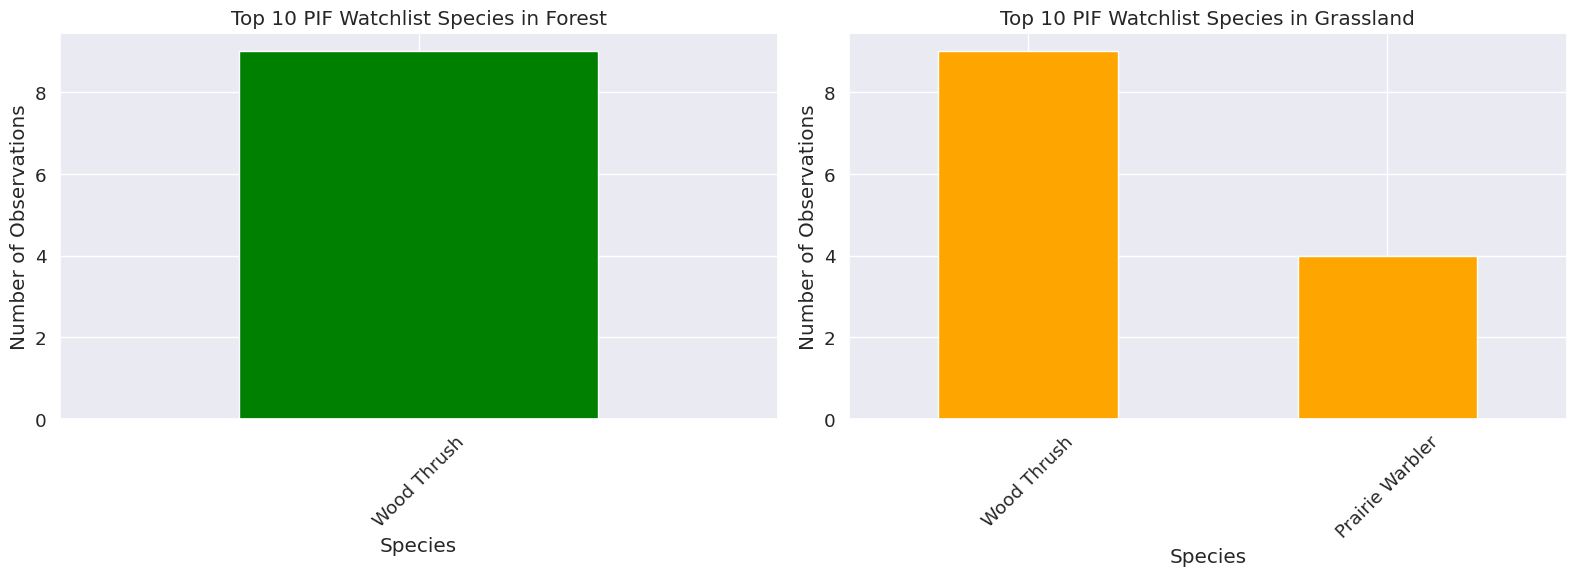

<Figure size 1000x600 with 0 Axes>

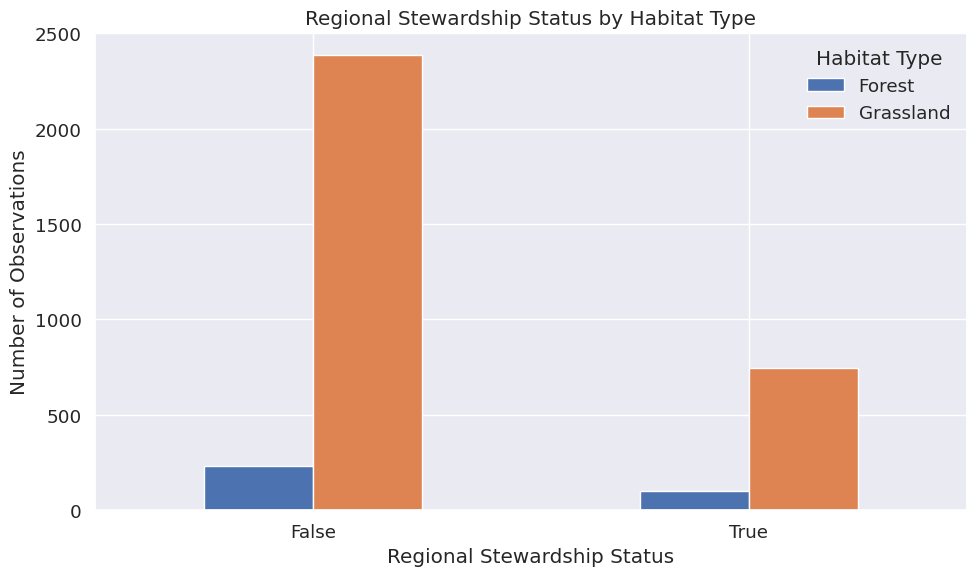

<Figure size 1000x600 with 0 Axes>

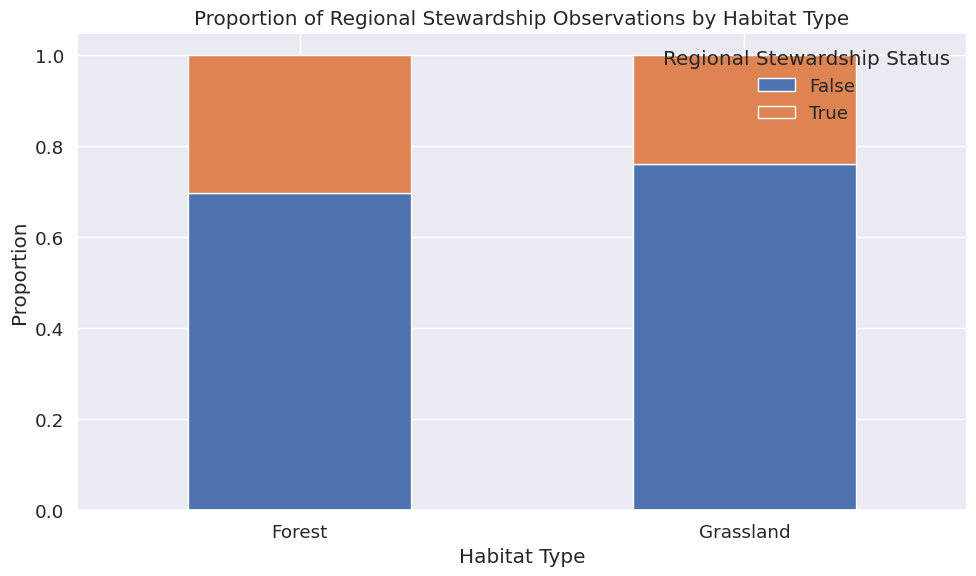

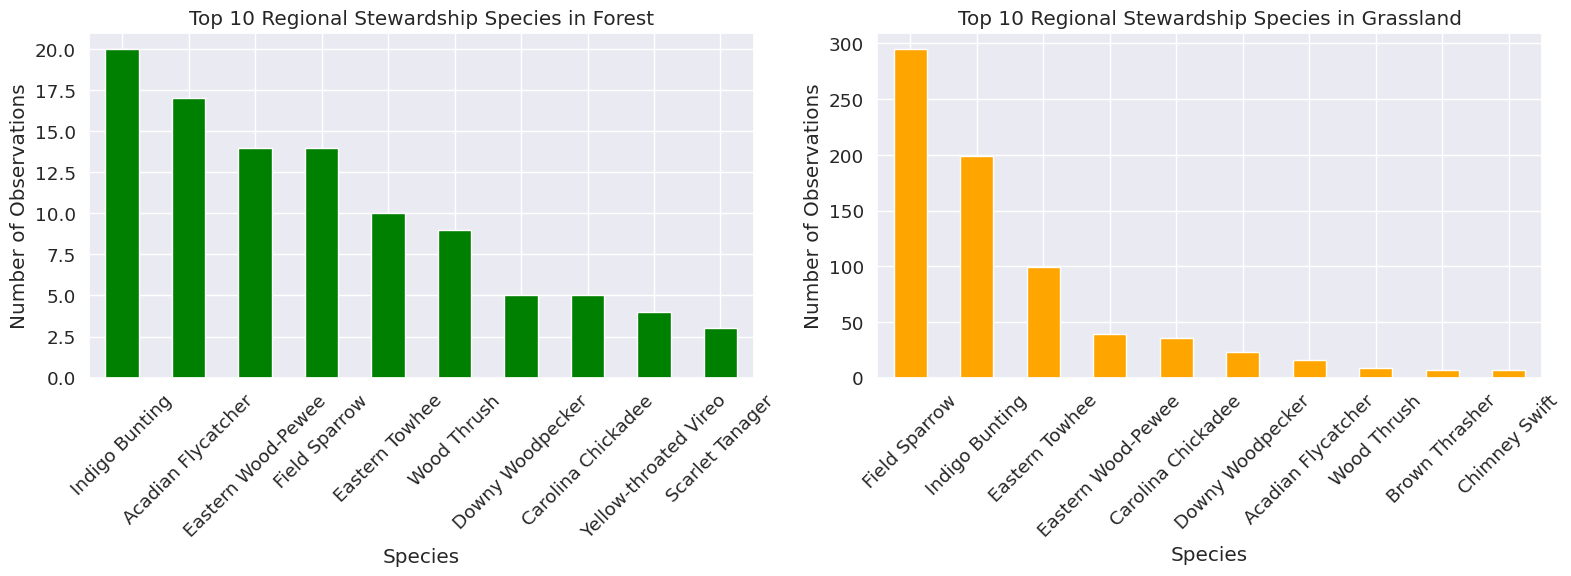

In [ ]:
# Analyze conservation status
if 'PIF_Watchlist_Status' in combined_df.columns:
    # PIF Watchlist status by habitat
    plt.figure(figsize=(10, 6))
    watchlist_counts = combined_df.groupby(['PIF_Watchlist_Status', 'Habitat_Type']).size().unstack()
    watchlist_counts.plot(kind='bar', figsize=(10, 6))
    plt.title('PIF Watchlist Status by Habitat Type')
    plt.xlabel('PIF Watchlist Status')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=0)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('watchlist_status_by_habitat.png')
    plt.show()

    # Calculate proportion of watchlist species by habitat
    watchlist_prop = combined_df.groupby(['Habitat_Type', 'PIF_Watchlist_Status']).size().unstack()
    watchlist_prop = watchlist_prop.div(watchlist_prop.sum(axis=1), axis=0)

    plt.figure(figsize=(10, 6))
    watchlist_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Proportion of PIF Watchlist Observations by Habitat Type')
    plt.xlabel('Habitat Type')
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.legend(title='PIF Watchlist Status')
    plt.tight_layout()
    plt.savefig('watchlist_proportion_by_habitat.png')
    plt.show()

    # Top watchlist species by habitat
    forest_watchlist = combined_df[(combined_df['Habitat_Type'] == 'Forest') &
                                  (combined_df['PIF_Watchlist_Status'] == True)]['Common_Name'].value_counts().head(10)
    grassland_watchlist = combined_df[(combined_df['Habitat_Type'] == 'Grassland') &
                                      (combined_df['PIF_Watchlist_Status'] == True)]['Common_Name'].value_counts().head(10)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    forest_watchlist.plot(kind='bar', ax=ax1, color='green')
    ax1.set_title('Top 10 PIF Watchlist Species in Forest')
    ax1.set_xlabel('Species')
    ax1.set_ylabel('Number of Observations')
    ax1.tick_params(axis='x', rotation=45)

    grassland_watchlist.plot(kind='bar', ax=ax2, color='orange')
    ax2.set_title('Top 10 PIF Watchlist Species in Grassland')
    ax2.set_xlabel('Species')
    ax2.set_ylabel('Number of Observations')
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('top_watchlist_species_by_habitat.png')
    plt.show()

# Regional Stewardship Status
if 'Regional_Stewardship_Status' in combined_df.columns:
    # Regional Stewardship status by habitat
    plt.figure(figsize=(10, 6))
    stewardship_counts = combined_df.groupby(['Regional_Stewardship_Status', 'Habitat_Type']).size().unstack()
    stewardship_counts.plot(kind='bar', figsize=(10, 6))
    plt.title('Regional Stewardship Status by Habitat Type')
    plt.xlabel('Regional Stewardship Status')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=0)
    plt.legend(title='Habitat Type')
    plt.tight_layout()
    plt.savefig('stewardship_status_by_habitat.png')
    plt.show()

    # Calculate proportion of stewardship species by habitat
    stewardship_prop = combined_df.groupby(['Habitat_Type', 'Regional_Stewardship_Status']).size().unstack()
    stewardship_prop = stewardship_prop.div(stewardship_prop.sum(axis=1), axis=0)

    plt.figure(figsize=(10, 6))
    stewardship_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Proportion of Regional Stewardship Observations by Habitat Type')
    plt.xlabel('Habitat Type')
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.legend(title='Regional Stewardship Status')
    plt.tight_layout()
    plt.savefig('stewardship_proportion_by_habitat.png')
    plt.show()

    # Top stewardship species by habitat
    forest_stewardship = combined_df[(combined_df['Habitat_Type'] == 'Forest') &
                                    (combined_df['Regional_Stewardship_Status'] == True)]['Common_Name'].value_counts().head(10)
    grassland_stewardship = combined_df[(combined_df['Habitat_Type'] == 'Grassland') &
                                        (combined_df['Regional_Stewardship_Status'] == True)]['Common_Name'].value_counts().head(10)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    forest_stewardship.plot(kind='bar', ax=ax1, color='green')
    ax1.set_title('Top 10 Regional Stewardship Species in Forest')
    ax1.set_xlabel('Species')
    ax1.set_ylabel('Number of Observations')
    ax1.tick_params(axis='x', rotation=45)

    grassland_stewardship.plot(kind='bar', ax=ax2, color='orange')
    ax2.set_title('Top 10 Regional Stewardship Species in Grassland')
    ax2.set_xlabel('Species')
    ax2.set_ylabel('Number of Observations')
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('top_stewardship_species_by_habitat.png')
    plt.show()

**AOU Code Patterns**

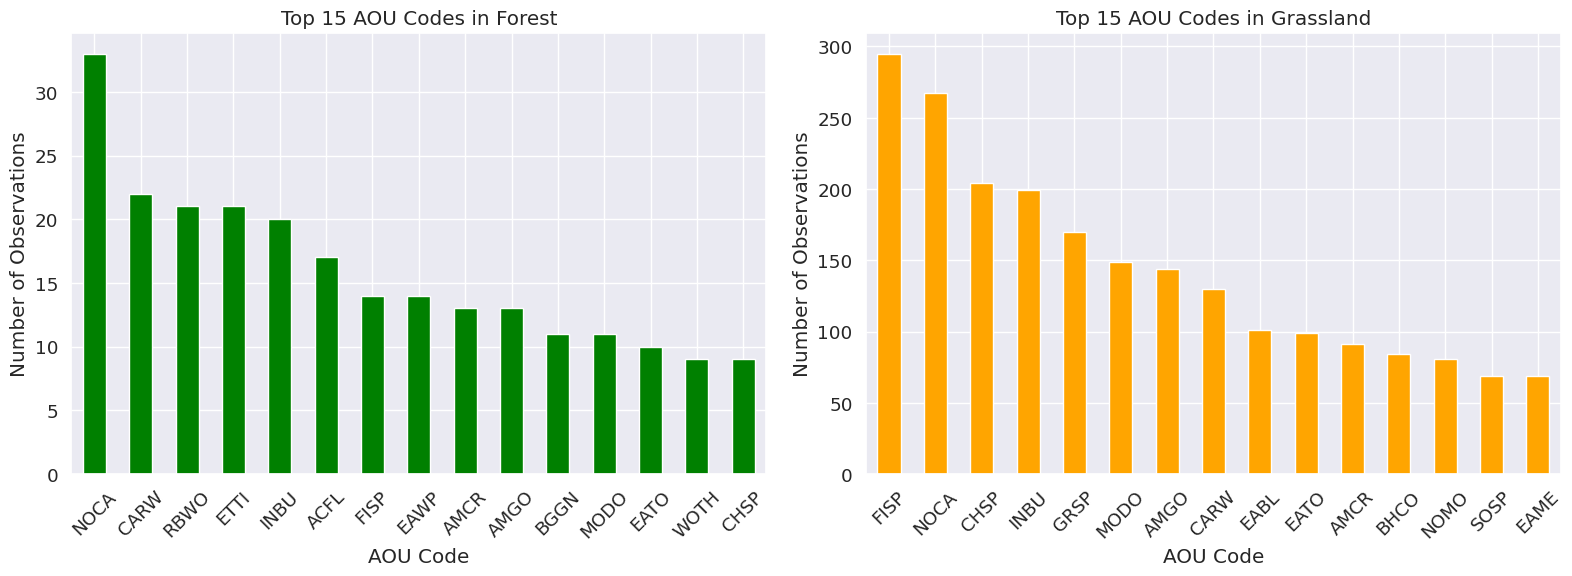

<Figure size 1400x800 with 0 Axes>

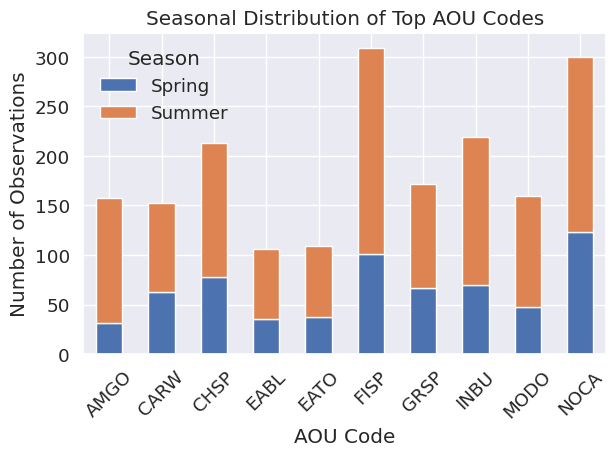

<Figure size 1200x800 with 0 Axes>

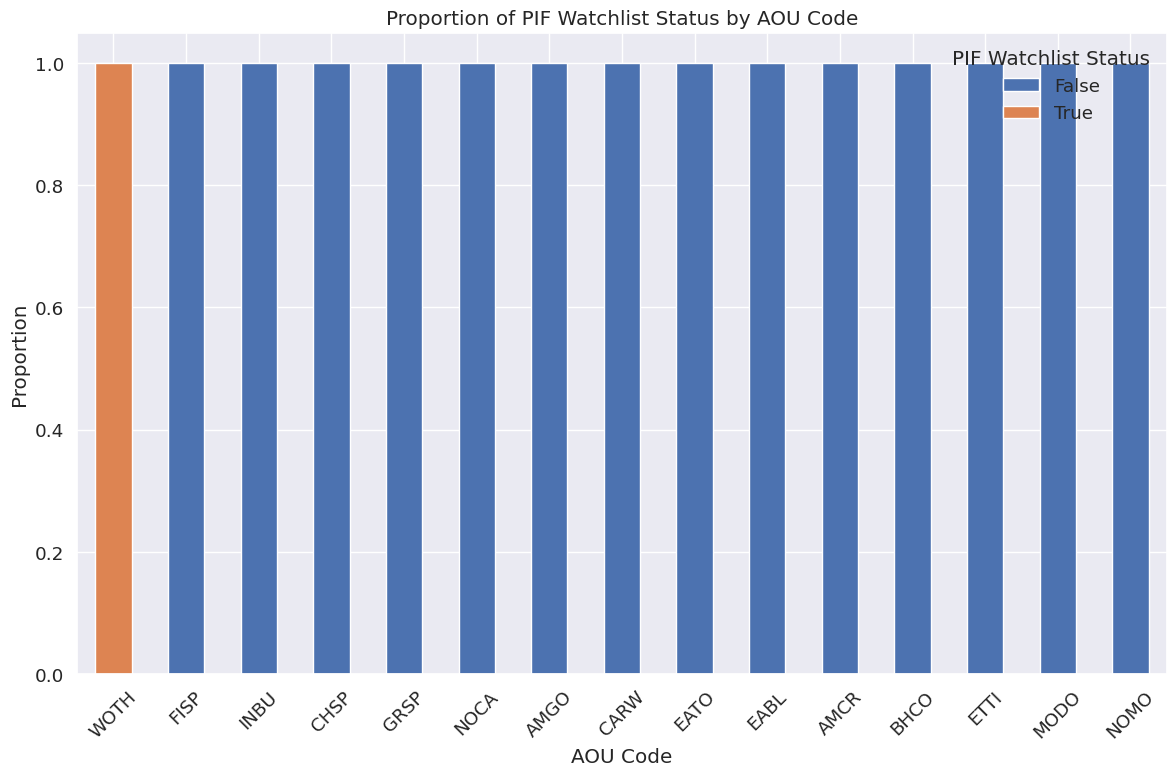

In [ ]:
# Analyze AOU Code patterns
if 'AOU_Code' in combined_df.columns:
    # Top AOU codes by habitat
    top_aou_forest = combined_df[combined_df['Habitat_Type'] == 'Forest']['AOU_Code'].value_counts().head(15)
    top_aou_grassland = combined_df[combined_df['Habitat_Type'] == 'Grassland']['AOU_Code'].value_counts().head(15)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    top_aou_forest.plot(kind='bar', ax=ax1, color='green')
    ax1.set_title('Top 15 AOU Codes in Forest')
    ax1.set_xlabel('AOU Code')
    ax1.set_ylabel('Number of Observations')
    ax1.tick_params(axis='x', rotation=45)

    top_aou_grassland.plot(kind='bar', ax=ax2, color='orange')
    ax2.set_title('Top 15 AOU Codes in Grassland')
    ax2.set_xlabel('AOU Code')
    ax2.set_ylabel('Number of Observations')
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('top_aou_codes_by_habitat.png')
    plt.show()

    # AOU code patterns by season
    if 'Season' in combined_df.columns:
        # Get top AOU codes for better visualization
        top_aou_codes = combined_df['AOU_Code'].value_counts().head(10).index.tolist()
        top_aou_data = combined_df[combined_df['AOU_Code'].isin(top_aou_codes)]

        aou_season = pd.crosstab(top_aou_data['AOU_Code'], top_aou_data['Season'])
        plt.figure(figsize=(14, 8))
        aou_season.plot(kind='bar', stacked=True)
        plt.title('Seasonal Distribution of Top AOU Codes')
        plt.xlabel('AOU Code')
        plt.ylabel('Number of Observations')
        plt.xticks(rotation=45)
        plt.legend(title='Season')
        plt.tight_layout()
        plt.savefig('aou_codes_by_season.png')
        plt.show()

    # AOU code conservation status
    if 'PIF_Watchlist_Status' in combined_df.columns:
        aou_conservation = pd.crosstab(combined_df['AOU_Code'], combined_df['PIF_Watchlist_Status'])
        # Filter to AOU codes with sufficient observations
        aou_counts = combined_df['AOU_Code'].value_counts()
        significant_aou = aou_counts[aou_counts > 10].index.tolist()
        aou_conservation_filtered = aou_conservation.loc[significant_aou]

        # Calculate proportion of watchlist status
        aou_conservation_prop = aou_conservation_filtered.div(aou_conservation_filtered.sum(axis=1), axis=0)
        aou_conservation_prop = aou_conservation_prop.sort_values(True, ascending=False).head(15)

        plt.figure(figsize=(12, 8))
        aou_conservation_prop.plot(kind='bar', stacked=True, figsize=(12, 8))
        plt.title('Proportion of PIF Watchlist Status by AOU Code')
        plt.xlabel('AOU Code')
        plt.ylabel('Proportion')
        plt.xticks(rotation=45)
        plt.legend(title='PIF Watchlist Status')
        plt.tight_layout()
        plt.savefig('aou_codes_conservation_status.png')
        plt.show()

# **Based on the exploratory data analysis have performed, here are some insights :**

## **1. Wildlife Conservation:**

The species diversity analysis showed that the grassland habitat has a significantly higher number of unique bird species compared to the forest habitat (78 vs 46). This suggests that grasslands in this study area are crucial for overall avian biodiversity and warrant focused conservation efforts.
The species overlap analysis and Venn diagram highlighted that while there's a considerable number of common species, there are also species unique to each habitat. Conservation strategies should be tailored to protect both the unique species in each ecosystem and the shared species across both.
The analysis of PIF Watchlist Status and Regional Stewardship Status by habitat revealed that both habitats contain species of conservation concern (those on the PIF Watchlist or with Regional Stewardship status). Identifying the specific species in each habitat (shown in the bar plots for top watchlist/stewardship species) is crucial for targeted conservation actions. For instance, the Wood Thrush appears on the PIF Watchlist in both habitats, indicating it might require broader conservation strategies.
The AOU code patterns and their relationship with conservation status can help prioritize conservation efforts for specific bird groups or families.
## **2. Land Management:**

The species diversity by location type and habitat confirms the importance of both forest and grassland areas, guiding land management decisions to maintain a mosaic of habitats.
The plot-level analysis (observations and species diversity by plot) can help identify specific areas within each habitat that are particularly rich in bird life or host unique species. This information is valuable for prioritizing land management activities, such as habitat restoration or protection, at a finer spatial scale. Plots with higher diversity or observations of at-risk species could be designated as high-priority areas.
Understanding the impact of environmental conditions like temperature, humidity, sky, and wind (though correlations with bird count were weak in this dataset) can inform management practices aimed at creating favorable microhabitats.
Analyzing the impact of disturbances can help land managers understand which types of disturbances (if any are present and significant in the data) have the most negative impact on bird observations and implement mitigation strategies.
## **3. Eco-Tourism:**

The seasonal and monthly trends in bird observations can inform the best times of year for bird-watching activities in each habitat. The data shows that most observations occurred during Spring and Summer, suggesting these seasons might be peak times for bird activity and diversity.
The plot-level analysis can pinpoint specific plots or areas that consistently have high bird observation counts and species diversity, making them ideal locations for developing bird-watching trails or tours.
Highlighting the presence of unique species in each habitat (from the species overlap analysis) can be a key selling point for attracting tourists interested in seeing specific types of birds.
Analyzing observer trends and visit patterns could provide insights into which locations or time periods are most popular with observers, helping to optimize eco-tourism planning and infrastructure development.
## **4. Sustainable Agriculture:**

While the datasets are focused on forest and grassland, understanding the environmental conditions preferred by different species (even if correlations are weak in this dataset) can inform agricultural practices near these habitats. For example, minimizing pesticide use during peak breeding seasons or maintaining buffer zones could be beneficial.
Identifying common species found in both habitats could indicate species that are more adaptable and might be more likely to thrive in areas adjacent to agricultural lands.
Understanding the impact of disturbances (if any are related to agricultural practices) could inform the development of more sustainable farming methods that minimize negative effects on bird populations.
## **5. Policy Support:**

The data on PIF Watchlist Status and Regional Stewardship Status provides direct evidence for identifying species that require policy intervention and protection. The analysis shows which habitats are more important for these at-risk species.
Insights from the temporal and spatial analyses can inform policies related to land use planning and conservation area designation. For example, if certain plots show consistently high diversity, policies could be put in place to protect these areas.
Understanding environmental correlations and the impact of disturbances can support the development of policies related to environmental regulations and land management practices aimed at mitigating negative impacts on bird populations.
The species diversity and composition analysis provides baseline data for monitoring the effectiveness of existing conservation policies.
## **6. Biodiversity Monitoring:**

The temporal analysis (seasonal, monthly, yearly trends) provides a baseline for monitoring changes in bird populations over time. Significant deviations from observed patterns in future monitoring could indicate environmental changes or other factors impacting bird populations.
Monitoring species diversity metrics (overall, by location, by plot) over time is a direct way to track the health and stability of avian communities in these habitats.
Analyzing changes in the presence and abundance of top species or watchlist/stewardship species can serve as indicators of ecosystem health.
Tracking AOU code patterns can help monitor changes in the composition of bird communities.